# Introductory Atoti Tutorial

## Overview

We will be exploring how to use **Atoti**.
Our main focus will be on cube creation and the various ways one can slice and dice sales data.

We will use simple sales data comprising of orders, customers, products and employees in order to show how simple it is to create a basic cube from this data, and how to further embellish it to meet our BI (Business Intelligence) needs.

**Customers** order amounts of **Products** from **Employees**. These **Orders** are what we will work with.

### This tutorial will cover the following:

* [What is Atoti](#What-is-Atoti?)
* [Getting started with Atoti](#Getting-Started)
* [Loading data](#Loading-data)
* [Joining tables](#Joining-tables-in-the-database)
* [Visualizing the cube](#Visualizing-the-cube)
* [Manipulating hierarchies and levels](#Manipulating-hierarchies-and-levels)
* [Creating new measures](#Creating-Measures)
* [Aggregating and using vectors](#Aggregating-and-using-vectors)
* [Lookup measures](#Lookup-measures)
* [Simulations / What-ifs](#Simulations-/-What-ifs)
* [Querying the cube](#Querying-the-Cube)
* [Creating a Dashboard](#Creating-Dashboards)
* [Further Reading](#Further-Reading)

💡 **Note:** The material in this tutorial is also available in our more comprehensive Java and Python API courses, available on request.

<div style="text-align: center;" ><a href="https://www.atoti.io/?utm_source=gallery&utm_content=introductory-tutorial" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Discover-Atoti-now.png" alt="Try atoti"></a></div>

## What is Atoti?

<!-- <div style="text-align: center;"><a href="https://www.atoti.io/?utm_source=gallery&utm_content=bike-sales" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/bike-sales/atoti-definition.PNG" alt="Try Atoti"></a></div> -->

**Atoti** is a BI analytics platform combining a Python library and a web application to help Quants, Data Analysts, Data Scientists, and the business to collaborate, analyze, and translate their data into business KPIs. Atoti can load data from various sources into an in-memory database from which a multi-dimensional cube can be built. The workflow into an ActivePivot cube server can be viewed as follows.

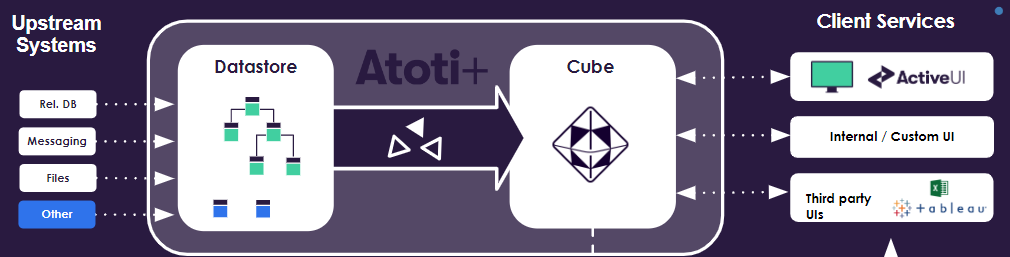

A few key points:

* An internal database is created to model and store the input data.
* Source data can be loaded from a number of different sources.
* Once data is loaded, the data is aggregated and a cube is created.
* Additional measures can be created based off these raw aggregated numbers to allow for...
    * Currency conversions.
    * Non-linear aggregations.
    * More complex calculations based off existing data.
* Visualization can be done in ActiveViam's ActiveUI, or even Excel and other BI tools. This allows the user to slice and dice the data in any way. We will see this in action when we visualize the cube.

💡 **Note:** See [Atoti](https://www.atoti.io) for guides, a tutorial, articles, videos and a set of example notebooks.

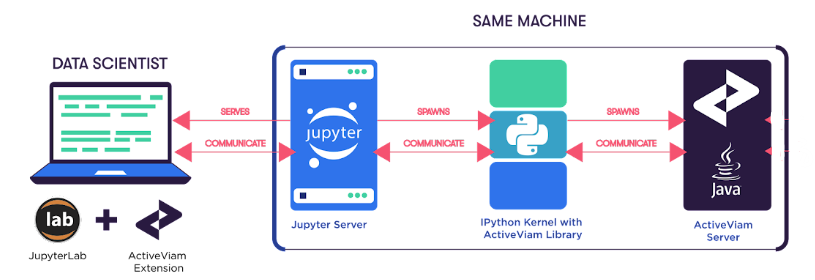

A few key points:

* The **Atoti Python API** made by ActiveViam comes with a free Community Edition. The Atoti Community Edition is subjected to [EULA](https://docs.atoti.io/latest/eula.html) that limits the number of users who could use the application. And of course, it is not meant for commercial use.
* The **Atoti** Jupyter lab extension allows data scientists and business users to analyse data and create metrics/measures on the fly and on their own desktops.
* Once new measures have been created that meet the business needs, they may be incorporated into a deployed server environment by the IT dev team.
* **Atoti Python API** is the desktop python environment that allows data scientists to analyise their data and formulate new measures as required. The Atoti server deployment API however, can be implemented in either Java or Python as a fully-fledged project. Such a server can form a production system that is separate to the desktop Jupyter lab environment.
* There are locked features in the **Atoti Python API** that is not available with the community edition. [Register online](https://www.atoti.io/evaluation-license-request) to request for an evaluation license and check the documentation on how you can [unlock these features](https://docs.atoti.io/latest/how_tos/unlock_all_features.html).

## Getting Started

Refer to [Atoti's tutorial](https://docs.atoti.io/tutorial) for more examples on how to get started. Or check out the other notebooks in our [notebook gallery](https://github.com/atoti/atoti/tree/main).


### Quick [Installation](https://docs.atoti.io/latest/getting_started/installation.html) Guide

Install the [Anaconda 64-bit](https://docs.anaconda.com/anaconda/install) python package manager.

And run the following:

* `conda config --add channels conda-forge`
* `conda config --add channels https://conda.atoti.io`
* `conda create --name atoti`
* `conda activate atoti`
* `conda install atoti atoti-jupyterlab3 python`

And start your Jupyter kernel in a shell:    

* `jupyter lab`

This will also open a browser with which you can open any notebook files (.ipynb).

### Running your notebook

We'll be completing this exploration of sales order data using the Atoti library and a little bit of pandas (for dataframes).
For this, we first need to import the two libraries...

In [1]:
import atoti as tt
import pandas as pd

We now need create an Atoti session.
We want to create this session with two specific bits of configuration:

* One to specify that we want to persist UI dashboards etc in an H2 file-based database.
* The other to specify the port number of the Atoti cube server.

Both of these are optional.
For this notebook, we want to be able to save our dashboards so we can use them each time we spin up the cube server. We also want to use the same port number to access the UI each time.

Let's create the Atoti session using this configuration...

In [2]:
session = tt.Session(
    user_content_storage="./content",
    port=9090,
)

This has actually launched a Java Virtual Machine (JVM) running an empty cube in the background (it will take a few seconds to start).

It is this cube server that we will be loading data into and manipulating hierarchies and measures. If you wish to see the server log, you can locate it by running the following command...

In [3]:
session.logs_path

PosixPath('/Users/hetal/.atoti/1715181150_X4CFW8/logs/server.log')

## Loading data

At the heart of every **Atoti** server is an in-memory database. This database is then used to construct the cube, its hierarchies and aggregated measures.

We have some sales order data in a CSV file, so let's load this data into the **Atoti** database...

In [4]:
orders = session.read_csv(
    "data/Orders.csv",
    keys=["OrderId"],
    table_name="Orders",
    types={"OrderDate": tt.type.LOCAL_DATE},
    date_patterns={"OrderDate": "DD/mm/yyyy"},
)

💡 **Note:** For the `OrderDate` column, we want the data to be parsed as LocalDate objects and not as Strings.

When overriding the default column types, we specify the "types" mapping. Where a pattern is required, then we also need to specify the "date_patterns" attribute.

Let's see what has been loaded...

In [5]:
orders.head(100)

,OrderDate,QuantitySold,SellingPricePerUnit,ShipperName,ProductId,EmployeeId,CustomerId
OrderId,,,,,,,
9,2019-01-18,339,19.39,The Transporter,1423,18336,c5755
19,2019-01-18,971,11.1,Freight United,708,18422,c1891
29,2019-01-18,716,12.56,Rapid Post,1202,18465,c3235
39,2019-01-18,120,284.01,Speedy Express,1410,18508,c3179
49,2019-01-18,471,51.67,United Package,1111,26584,c2003
...,...,...,...,...,...,...,...
151,2019-01-17,384,8.51,Freight United,1267,18637,c3235
161,2019-01-17,310,12.18,The Transporter,1033,18637,c2675
171,2019-01-17,89,11.45,United Package,1228,18379,c4131


Now let's load some reference data for Customers, Products and Employees into their own tables...

In [6]:
products = session.read_csv(
    "data/Products.csv",
    table_name="Products",
    keys=["ProductId"],
    separator=",",
    encoding="iso-8859-1",
)

Note the use of the "encoding" parameter because this file contains characters that aren't standard ASCII.

In [7]:
products.head(20)

,ProductName,ProductCategory,Supplier,PurchasingPricePerUnit
ProductId,,,,
643,Ravioli Angelo,Grains/Cereals,Pasta Buttini s.r.l.,11.23
773,Chang,Beverages,Exotic Liquids,10.26
903,Gravad lax,Seafood,Svensk Sjöföda AB,18.72
1033,Lakkalikööri,Beverages,Karkki Oy,9.72
1163,Rhönbräu Klosterbier,Beverages,Plutzer Lebensmittelgroßmärkte AG,4.19
1293,Wimmers gute Semmelknödel,Grains/Cereals,Plutzer Lebensmittelgroßmärkte AG,21.55
1423,Gumbär Gummibärchen,Confections,Heli Süßwaren GmbH & Co. KG,16.81
656,Sir Rodneys Marmalade,Confections,"Specialty Biscuits, Ltd.",43.74
786,Pavlova,Confections,"Pavlova, Ltd.",9.39


We can check on any loading errors by running the following command...

In [8]:
products._loading_report.error_messages

[]

Or by checking the server log file in the location provided by the following command...

In [9]:
session.logs_path

PosixPath('/Users/hetal/.atoti/1715181150_X4CFW8/logs/server.log')

Let's now load in the Customers and Employees CSV files...

In [10]:
customers = session.read_csv(
    "data/Customers.csv",
    keys=["CustomerId"],
    table_name="Customers",
    encoding="iso-8859-1",
)

In [11]:
customers.head(10)

,CompanyName,Address,City,Region,PostalCode,Country,Phone
CustomerId,,,,,,,
c1331,HILARION-Abastos,Carrera 22 con Ave. Carlos Soublette #8-35,San Cristóbal,Táchira,5022,Venezuela,(5) 555-1340
c1891,GROSELLA-Restaurante,5ª Ave. Los Palos Grandes,Caracas,DF,1081,Venezuela,(2) 283-2951
c2451,LILA-Supermercado,Carrera 52 con Ave. Bolívar #65-98 Llano Largo,Barquisimeto,Lara,3508,Venezuela,(9) 331-6954
c3011,Lonesome Pine Restaurant,89 Chiaroscuro Rd.,Portland,OR,97219,USA,(503) 555-9573
c3571,Bon app',"12, rue des Bouchers",Marseille,N/A,13008,France,91.24.45.40
c4131,Eastern Connection,35 King George,London,N/A,WX3 6FW,UK,(171) 555-0297
c4691,Folies gourmandes,"184, chaussée de Tournai",Lille,N/A,59000,France,20.16.10.16
c5251,Cactus Comidas para llevar,Cerrito 333,Buenos Aires,N/A,1010,Argentina,(1) 135-5555
c5811,La corne d'abondance,"67, avenue de l'Europe",Versailles,N/A,78000,France,30.59.84.10


In [12]:
employees = session.read_csv(
    "data/Employees.csv", keys=["EmployeeId"], table_name="Employees"
)

In [13]:
employees.head(10)

,EmployeeName,EmployeeZone,EmployeeCountry,EmployeeCity
EmployeeId,,,,
18594,Laura Callahan,AMERICAS,USA,Seattle
18637,Andrew Fuller,AMERICAS,USA,Tacoma
12344,Paul Henry,EMEA,FR,Paris
18680,Robert King,EMEA,UK,London
12695,Louis Philippe,EMEA,FR,Lyon
26584,Eric Jeannot,EMEA,FR,Paris
18336,Steven Buchanan,EMEA,UK,London
63528,Sean Tan,ASIA,SG,Singapore
18379,Michael Suyama,EMEA,UK,London


We will also load in some data associated with the Shippers of the goods. This data shows the cost per unit to ship goods. The more goods shipped, the cheaper the rate per unit is.

In [14]:
shippers = session.read_csv(
    "data/Shippers.csv", keys=["Shipper", "Interval"], table_name="Shippers"
)

In [15]:
shippers.head(10)

Rate
Shipper          Interval                           
Federal Shipping Quantity less than 100         0.63
Speedy Express   Quantity more than 700        0.029
Freight United   Quantity less than 100         0.77
Federal Shipping Quantity between 100 and 300   0.09
                 Quantity between 300 and 500  0.061
United Package   Quantity between 500 and 700  0.021
Freight United   Quantity between 500 and 700  0.012
Federal Shipping Quantity between 500 and 700  0.017
The Transporter  Quantity between 500 and 700  0.009
Federal Shipping Quantity more than 700        0.014

### Loading Vectors

In **Atoti**, we can also load vectors, or arrays of values.

For this exercise we have a file of historic prices for each product. Each row will contain a vector of these historic prices per product.

In [16]:
historicalPrices = session.read_csv(
    "data/HistoricalPrices.csv",
    keys=["ProductId"],
    table_name="HistoricalPrices",
    types={"HistoricalPrice": tt.type.DOUBLE_ARRAY},
)

In [17]:
historicalPrices.head(10)

,HistoricalPrice
ProductId,
1254,"[2.58, 3.11, 4.18, 4.51, 2.56, 2.01, 2.77, 2.2..."
1384,"[5.33, 2.2, 4.54, 3.77, 4.87, 5.01, 5.31, 4.72..."
1514,"[22.34, 24.74, 15.61, 20.62, 14.02, 13.25, 20...."
643,"[6.13, 5.97, 13.58, 14.82, 5.75, 12.37, 16.84,..."
773,"[14.91, 13.95, 7.94, 5.21, 12.09, 8.13, 5.56, ..."
903,"[21.0, 18.67, 26.11, 26.8, 25.37, 20.58, 25.61..."
1033,"[10.09, 11.16, 12.32, 11.75, 10.69, 10.98, 12...."
1267,"[8.59, 7.01, 6.06, 8.45, 5.36, 8.7, 3.66, 6.48..."
1397,"[9.11, 4.14, 10.08, 4.71, 10.62, 8.6, 9.3, 9.4..."


Why use vectors?

* Vectors in **Atoti** are natively aggregated.
* They can save heap memory by only requiring **one** record instead of one record per vector element.
* The above vectors represent the historical prices of a product for the last 250 days.
* If we were to **not** use vectors, we would need to have one record per date per product, thus 250 records in the table instead of 1.
* Not only would this require more memory, it would also contribute many more cube locations, using even more heap memory, and slowing down access through queries.

We will look at how we can use these vector aggregations when we discuss creating measures.

💡 **Note:** We can further configure the loading of CSV files as described here: 
[Session read_csv](https://docs.atoti.io/latest/api/atoti.Session.read_csv.html#atoti.Session.read_csv)

## Joining tables in the database

Now we have loaded our data into different tables (or stores), we need to define the relationships between them.


Generally, the database will follow a Star schema with the largest store the "base" store. This store contains the data at the lowest level of granularity, known as the "facts" for the cube. In this project, the Orders table is the base store.

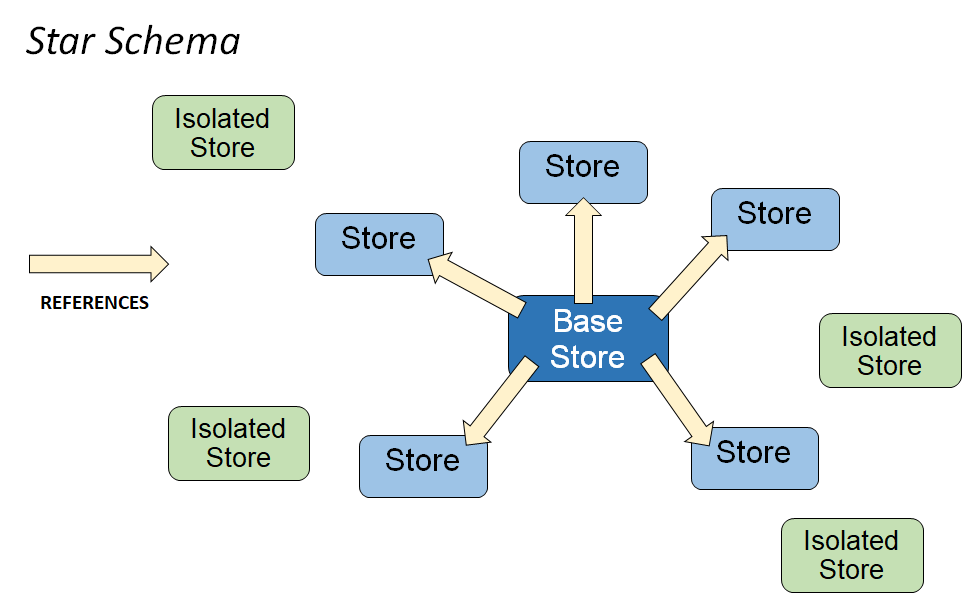



We can extend this further into a Snowflake Schema where referenced tables can reference further tables...



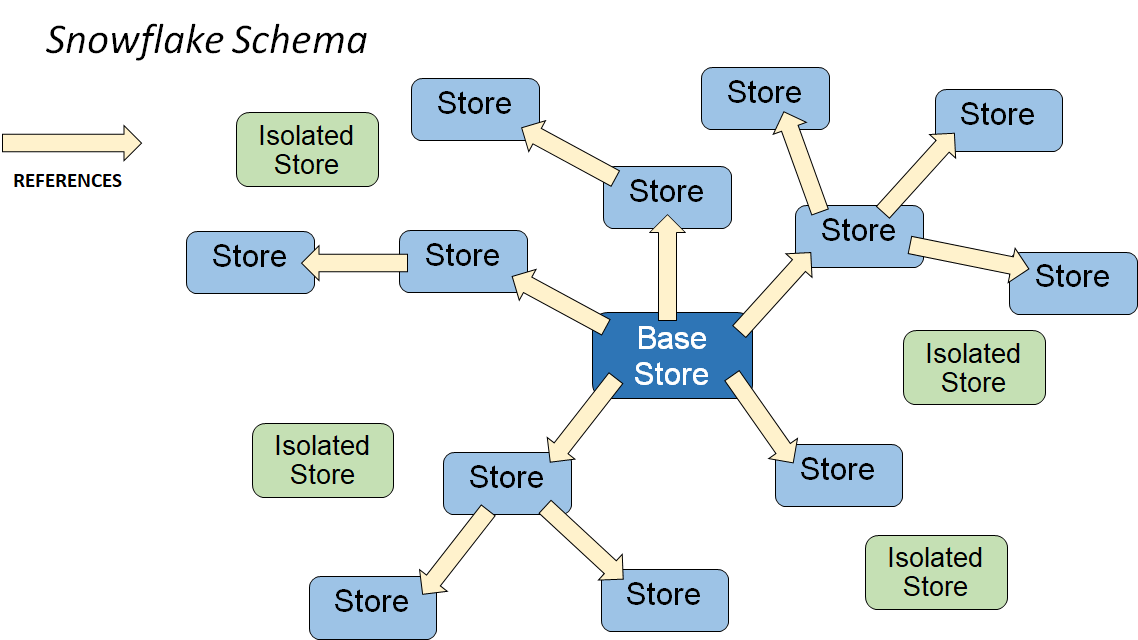

Let's join our main Orders table with the Products table...

In [18]:
orders.join(products, orders["ProductId"] == products["ProductId"])


We now want to join the Orders table with the Customers table...


In [19]:
orders.join(customers, orders["CustomerId"] == customers["CustomerId"])

Now join the Orders table with the Employees table...

In [20]:
orders.join(employees, orders["EmployeeId"] == employees["EmployeeId"])

And the historical prices with the Products table...

In [21]:
products.join(historicalPrices, products["ProductId"] == historicalPrices["ProductId"])


We can now see the relationships between the tables...


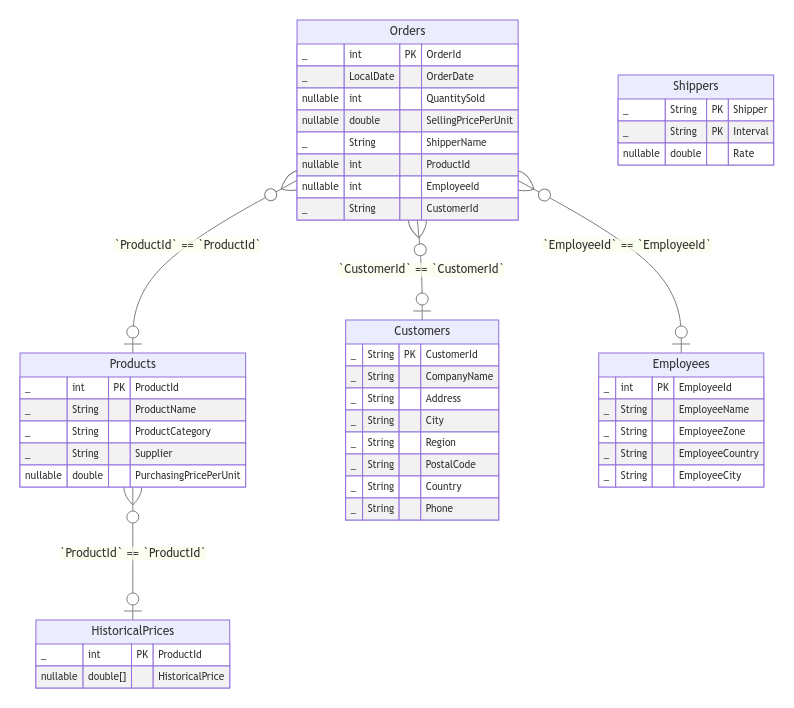

In [22]:
session.tables.schema

We can see that **Atoti** has inferred the data types for each column based on the data in the CSV files, unless we have explicitly specified the types (as with the OrderDate column in the Orders table)

💡 **Note:** We have an "isolated" table called "Shippers".

We will use this as a lookup table in order to determine the cost of transporting the goods for each order based on the number of goods sent.

## Lookup tables

Earlier, we loaded the Shippers table. Here are a few key points:

* It's key fields are "Shipper" and "Interval".
* The cost of shipping the goods depends on the quantity sold.
* The higher the quantity, the cheaper it is to transport the goods.
* This is what the data looks like:

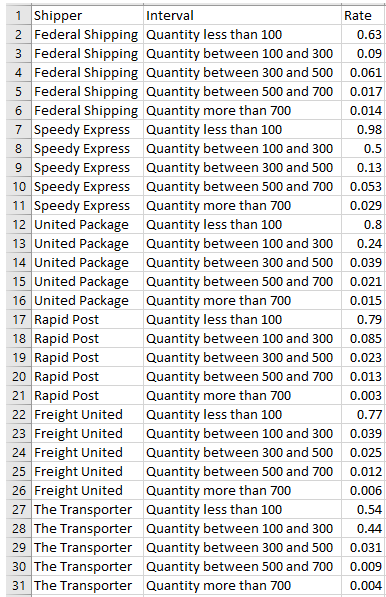

We know that the Orders table contains a "ShipperName" field, and we know there is a field called QuantitySold.

In order to determine how much it costs to ship a particular order we need to compare the QuantitySold value with the "Interval", a bucketing of differing quantities sold. We can "partially" join this table to the Orders table in the following way...

In [23]:
orders.join(shippers, orders["ShipperName"] == shippers["Shipper"])

This has now created an "analysis hierarchy" in the cube called Shippers with which we can look up the relevant transport rate according to the quantity sold for an order.

It's not properly joined with the Orders table, so represents a many-to-many join. One Order row cannot be joined to only one Shippers row because of this extra "Interval" key field on the Shippers table. You can now see in the schema that the join is represented with a dotted line...

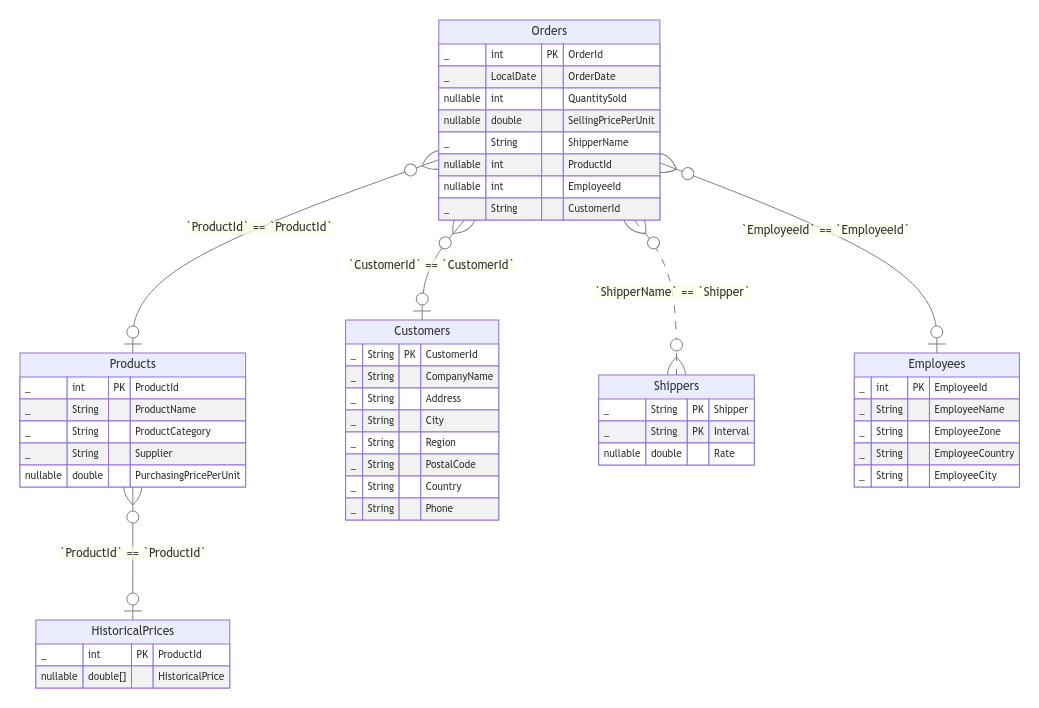

In [24]:
session.tables.schema

We'll see how we can use this new type of hierarchy a little later when we discuss lookup measures.

## Visualizing the cube

A few key points:

* When we create a cube, Atoti will use the columns from the joined tables to create levels in cube hierarchies automatically.
* We need to specify the "base" store from which the cube will use to do this.
* For a record to be reachable in the cube, it must exist in the base store.
* Here we will be using the **auto** mode where we let **Atoti** create hierarchies and measures for us.
* The measures are only created from the base store.
* This is the default mode, but this can be changed for different behaviour:
    * `auto`: Creates hierarchies for every key column or non-numeric column of the table, and measures for every numeric column.
    * `manual`: Does not create any hierarchy or measure (except for the count).
    * `no_measures`: Creates the hierarchies like auto but does not create any measures.

💡 **Note:** See [create_cube](https://docs.atoti.io/latest/api/atoti.Session.create_cube.html) for more details.

Let's create the cube and see what's been done for us.

In [25]:
cube = session.create_cube(orders, "OrdersCube")

You will notice that there is an **Atoti** Jupyter notebook extension allowing the creation of pivot tables, charts etc. By default, it will show a pivot table when you visualize the cube.

You can see the list of auto-generated measures and hierarchies.

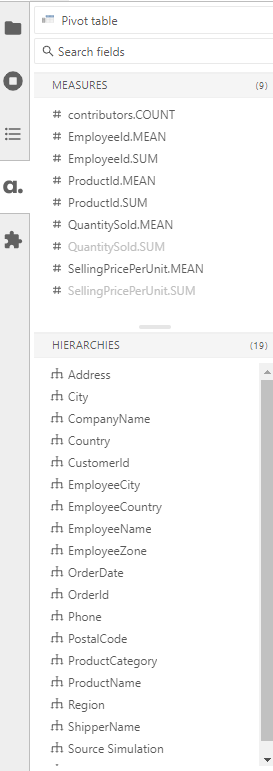

We can now visualize this cube within this notebook by creating a pivot table. After running the visualize command, a pivot table will be created. Click in this table and on the "A." **Atoti** UI plugin in the left-side drawer to visualize the cube.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
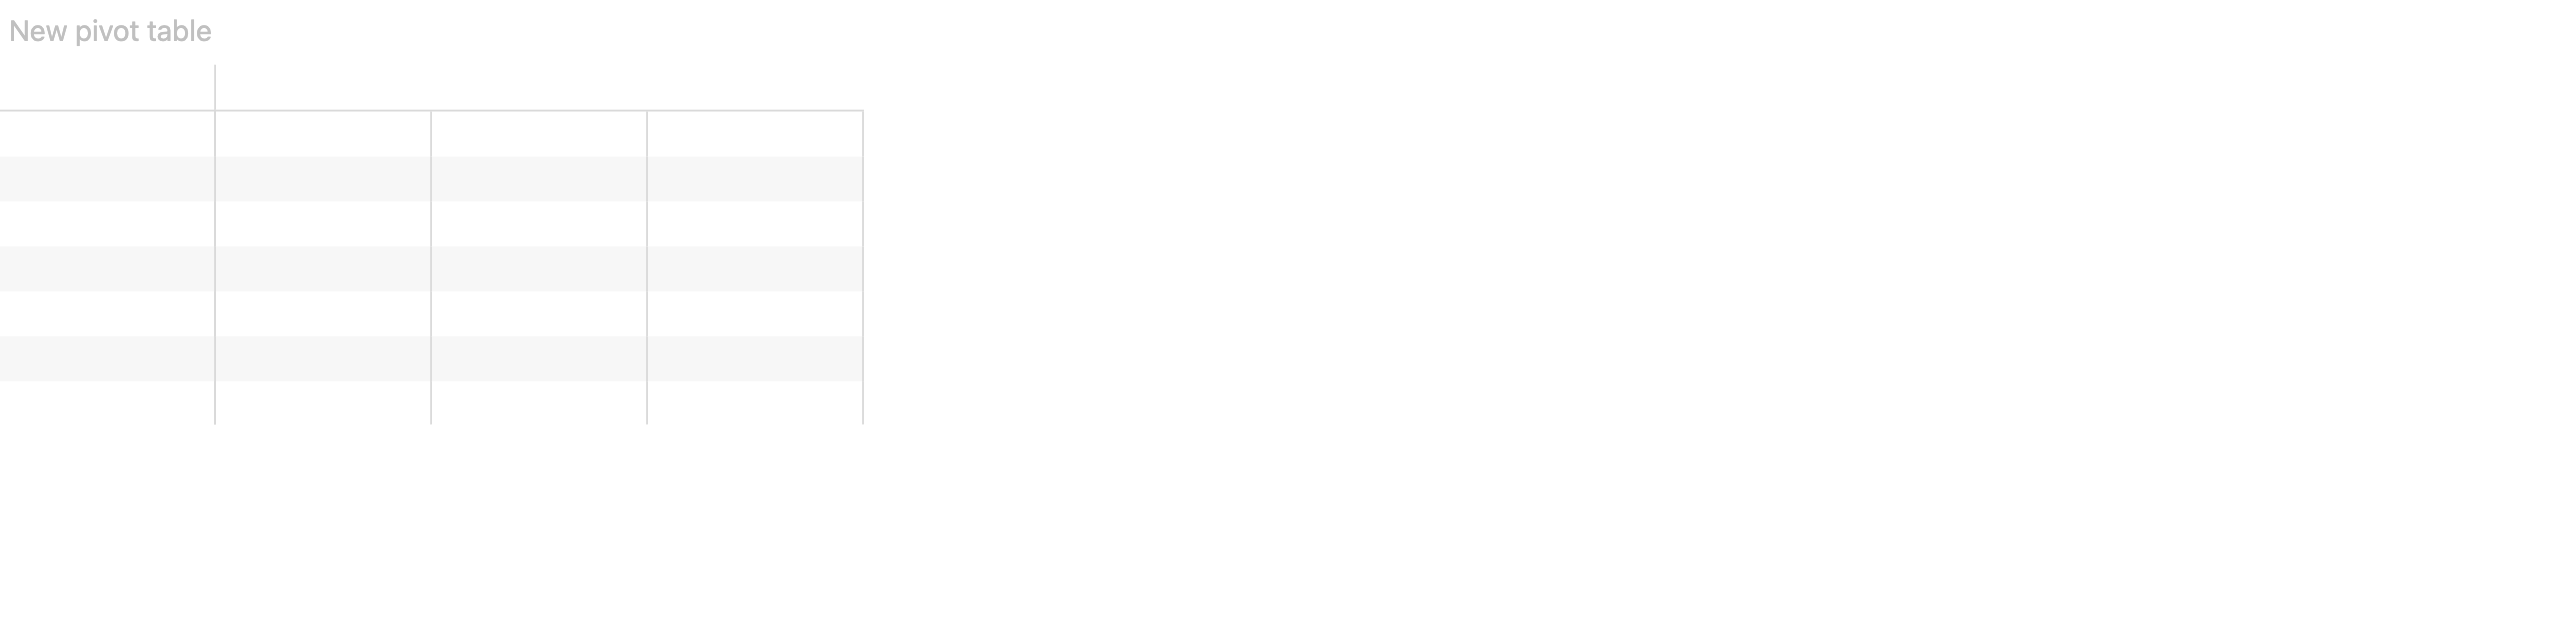

In [26]:
session.widget

**Atoti** has automatically created the following for us:

* Aggregated measures `.SUM` and `.MEAN` for all numerical fields.

* Single-level hierarchies based off all other non-numerical fields.

We can see that Atoti has created the following hierarchies, based on the non-numeric data loaded

In [27]:
hierarchies = cube.hierarchies

In [28]:
hierarchies

{('Products', 'Supplier'): <atoti.hierarchy.Hierarchy object at 0x136176fd0>, ('Orders', 'OrderDate'): <atoti.hierarchy.Hierarchy object at 0x136175dd0>, ('Products', 'ProductName'): <atoti.hierarchy.Hierarchy object at 0x136227650>, ('Customers', 'Phone'): <atoti.hierarchy.Hierarchy object at 0x136226d10>, ('Customers', 'Address'): <atoti.hierarchy.Hierarchy object at 0x136226e50>, ('Customers', 'Region'): <atoti.hierarchy.Hierarchy object at 0x136226b50>, ('Employees', 'EmployeeCountry'): <atoti.hierarchy.Hierarchy object at 0x1362269d0>, ('Products', 'ProductCategory'): <atoti.hierarchy.Hierarchy object at 0x136226990>, ('Customers', 'PostalCode'): <atoti.hierarchy.Hierarchy object at 0x136226a50>, ('Orders', 'CustomerId'): <atoti.hierarchy.Hierarchy object at 0x136226750>, ('Employees', 'EmployeeCity'): <atoti.hierarchy.Hierarchy object at 0x136226810>, ('Customers', 'Country'): <atoti.hierarchy.Hierarchy object at 0x136225ed0>, ('Shippers', 'Interval'): <atoti.hierarchy.Hierarchy object at 0x136226010>, ('Orders', 'OrderId'): <atoti.hierarchy.Hierarchy object at 0x136225d10>, ('Customers', 'CompanyName'): <atoti.hierarchy.Hierarchy object at 0x136225b90>, ('Orders', 'ShipperName'): <atoti.hierarchy.Hierarchy object at 0x136225b50>, ('Employees', 'EmployeeName'): <atoti.hierarchy.Hierarchy object at 0x136225c10>, ('Employees', 'EmployeeZone'): <atoti.hierarchy.Hierarchy object at 0x136225910>, ('Customers', 'City'): <atoti.hierarchy.Hierarchy object at 0x1362259d0>}

It has also created default "measures" based on aggregations of numeric data.

In [29]:
measures = cube.measures

In [30]:
list(measures)

['contributors.COUNT',
 'update.TIMESTAMP',
 'SellingPricePerUnit.SUM',
 'SellingPricePerUnit.MEAN',
 'QuantitySold.SUM',
 'QuantitySold.MEAN',
 'ProductId.SUM',
 'ProductId.MEAN',
 'EmployeeId.SUM',
 'EmployeeId.MEAN']


We will look at how we can override the default list of hierarchies and measures in the following sections.


## Manipulating hierarchies and levels



See the [Atoti hierarchies](https://docs.atoti.io/latest/api/atoti.hierarchies.Hierarchies.html) package for a full list of features.

### Removing Hierarchies

The automatically-generated list of hierarchies contains some ID hierarchies that we don't necessarily want to keep.

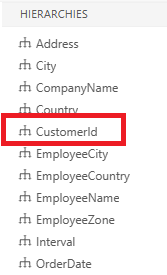

Let's look at how we can remove these.


We already have the hierarchies when we executed the following line.

In [31]:
hierarchies = cube.hierarchies

We can now delete the hierarchies we don't want to keep like this...

In [32]:
del hierarchies["CustomerId"]

And we can now see that the CustomerId hierarchy has been removed.

In [33]:
hierarchies

{('Products', 'Supplier'): <atoti.hierarchy.Hierarchy object at 0x136225d50>, ('Orders', 'OrderDate'): <atoti.hierarchy.Hierarchy object at 0x136259ed0>, ('Products', 'ProductName'): <atoti.hierarchy.Hierarchy object at 0x136259fd0>, ('Customers', 'Phone'): <atoti.hierarchy.Hierarchy object at 0x13625a0d0>, ('Customers', 'Address'): <atoti.hierarchy.Hierarchy object at 0x13625a1d0>, ('Customers', 'Region'): <atoti.hierarchy.Hierarchy object at 0x13625a2d0>, ('Employees', 'EmployeeCountry'): <atoti.hierarchy.Hierarchy object at 0x13625a410>, ('Products', 'ProductCategory'): <atoti.hierarchy.Hierarchy object at 0x13625a550>, ('Customers', 'PostalCode'): <atoti.hierarchy.Hierarchy object at 0x13625a690>, ('Employees', 'EmployeeCity'): <atoti.hierarchy.Hierarchy object at 0x13625a7d0>, ('Customers', 'Country'): <atoti.hierarchy.Hierarchy object at 0x13625a910>, ('Shippers', 'Interval'): <atoti.hierarchy.Hierarchy object at 0x13625aa50>, ('Orders', 'OrderId'): <atoti.hierarchy.Hierarchy object at 0x13625ab90>, ('Customers', 'CompanyName'): <atoti.hierarchy.Hierarchy object at 0x13625acd0>, ('Orders', 'ShipperName'): <atoti.hierarchy.Hierarchy object at 0x13625ae10>, ('Employees', 'EmployeeName'): <atoti.hierarchy.Hierarchy object at 0x13625af50>, ('Employees', 'EmployeeZone'): <atoti.hierarchy.Hierarchy object at 0x13625b090>, ('Customers', 'City'): <atoti.hierarchy.Hierarchy object at 0x13625b1d0>}

We can also see this when we visualize the cube...

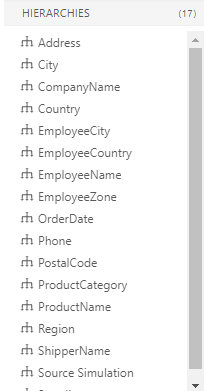

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
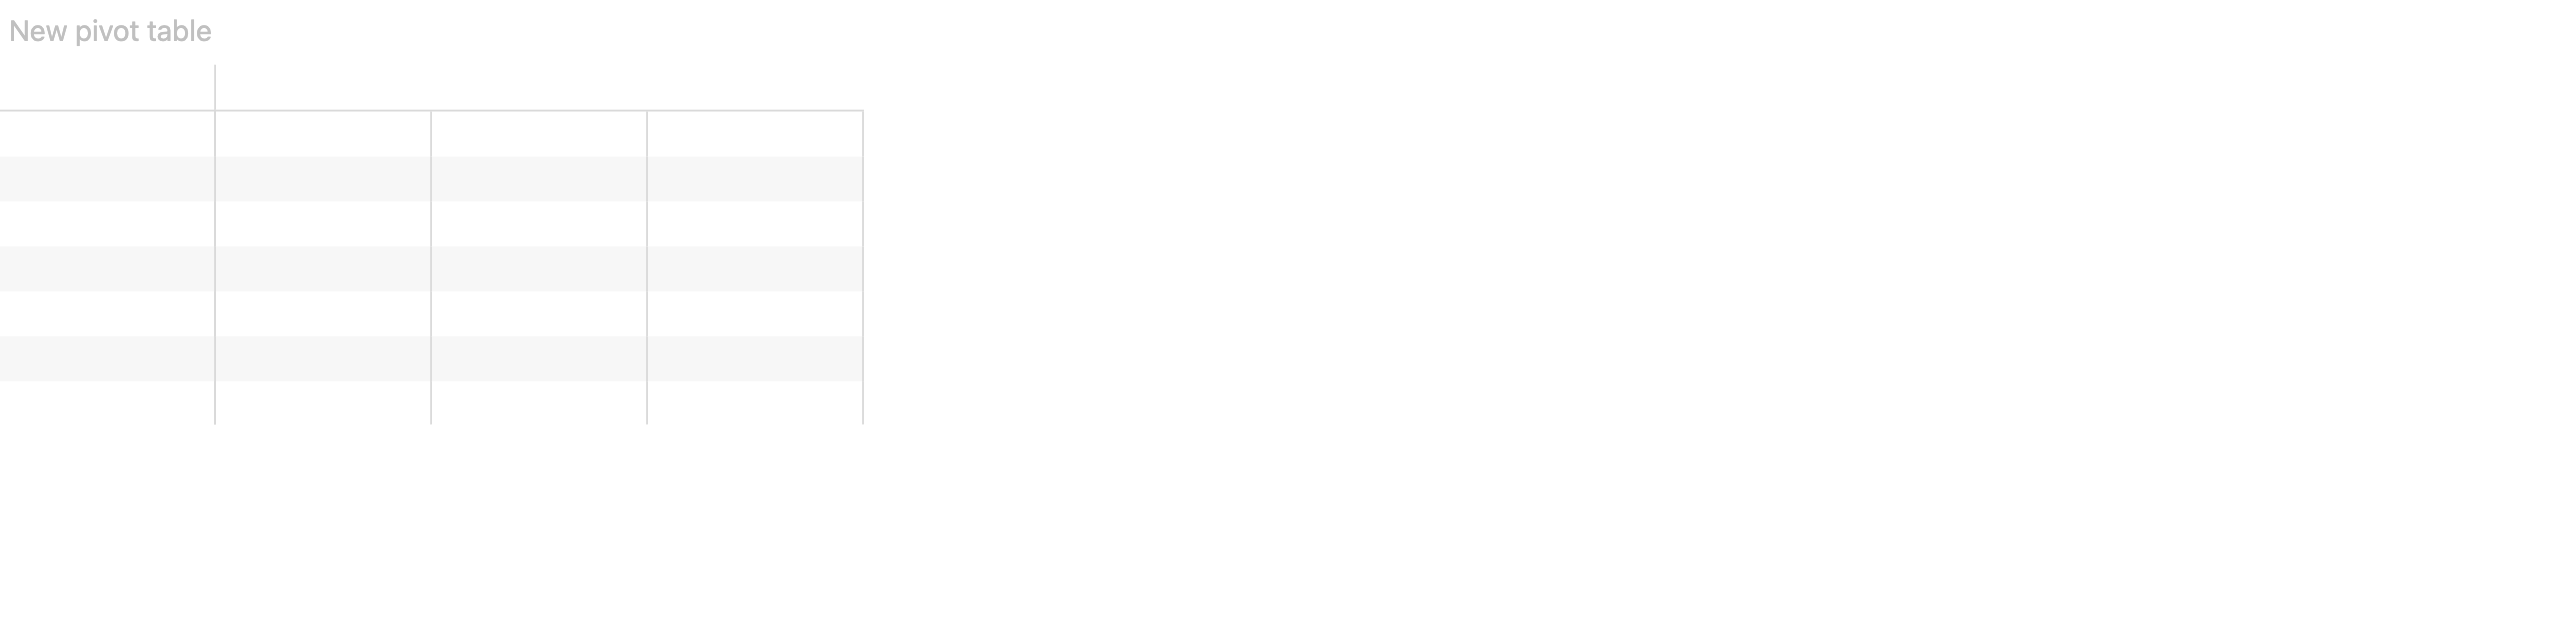

In [34]:
session.widget

### Creating Multi-Level Hierarchies

You would have noticed that there are two hierarchies called "ProductCategory" and "ProductName".

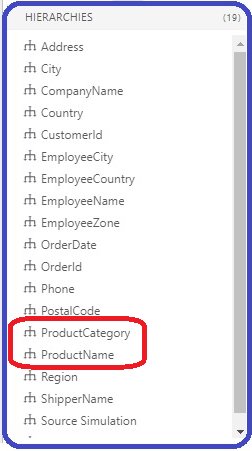

At the moment they are visualized as two separate hierarchies, but it would make sense to have these as two levels of the **same** hierarchy. This would allow us to first view the different product categories, and then drill down into the product names for each category.

We can restructure this into a new "Products" hierarchy as follows.

💡 **Note:** We can obtain the list of levels from the cube in order to create the new hierarchy

In [35]:
levels = cube.levels

In [36]:
hierarchies["Products"] = {
    "ProductCategory": levels["ProductCategory"],
    "ProductName": levels["ProductName"],
}

We now have the "Products" multi-level hierarchy and the previous single-level hierarchies.

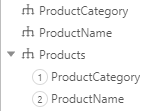

We can now remove the original single-level hierarchies "ProductCategory" and "ProductName"...

In [37]:
hierarchies

{('Products', 'Supplier'): <atoti.hierarchy.Hierarchy object at 0x136239890>, ('Orders', 'OrderDate'): <atoti.hierarchy.Hierarchy object at 0x136238c50>, ('Products', 'ProductName'): <atoti.hierarchy.Hierarchy object at 0x136238990>, ('Customers', 'Phone'): <atoti.hierarchy.Hierarchy object at 0x13623a410>, ('Customers', 'Address'): <atoti.hierarchy.Hierarchy object at 0x1362391d0>, ('Products', 'Products'): <atoti.hierarchy.Hierarchy object at 0x136128d90>, ('Customers', 'Region'): <atoti.hierarchy.Hierarchy object at 0x1361ac550>, ('Employees', 'EmployeeCountry'): <atoti.hierarchy.Hierarchy object at 0x13623e0d0>, ('Products', 'ProductCategory'): <atoti.hierarchy.Hierarchy object at 0x13623c310>, ('Customers', 'PostalCode'): <atoti.hierarchy.Hierarchy object at 0x13623ced0>, ('Employees', 'EmployeeCity'): <atoti.hierarchy.Hierarchy object at 0x13623dad0>, ('Customers', 'Country'): <atoti.hierarchy.Hierarchy object at 0x13623e6d0>, ('Shippers', 'Interval'): <atoti.hierarchy.Hierarchy object at 0x13623cc10>, ('Orders', 'OrderId'): <atoti.hierarchy.Hierarchy object at 0x13623e950>, ('Customers', 'CompanyName'): <atoti.hierarchy.Hierarchy object at 0x136275bd0>, ('Orders', 'ShipperName'): <atoti.hierarchy.Hierarchy object at 0x1362767d0>, ('Employees', 'EmployeeName'): <atoti.hierarchy.Hierarchy object at 0x136275b10>, ('Employees', 'EmployeeZone'): <atoti.hierarchy.Hierarchy object at 0x136260e10>, ('Customers', 'City'): <atoti.hierarchy.Hierarchy object at 0x13625bc50>}

Again, we can visualize this...

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
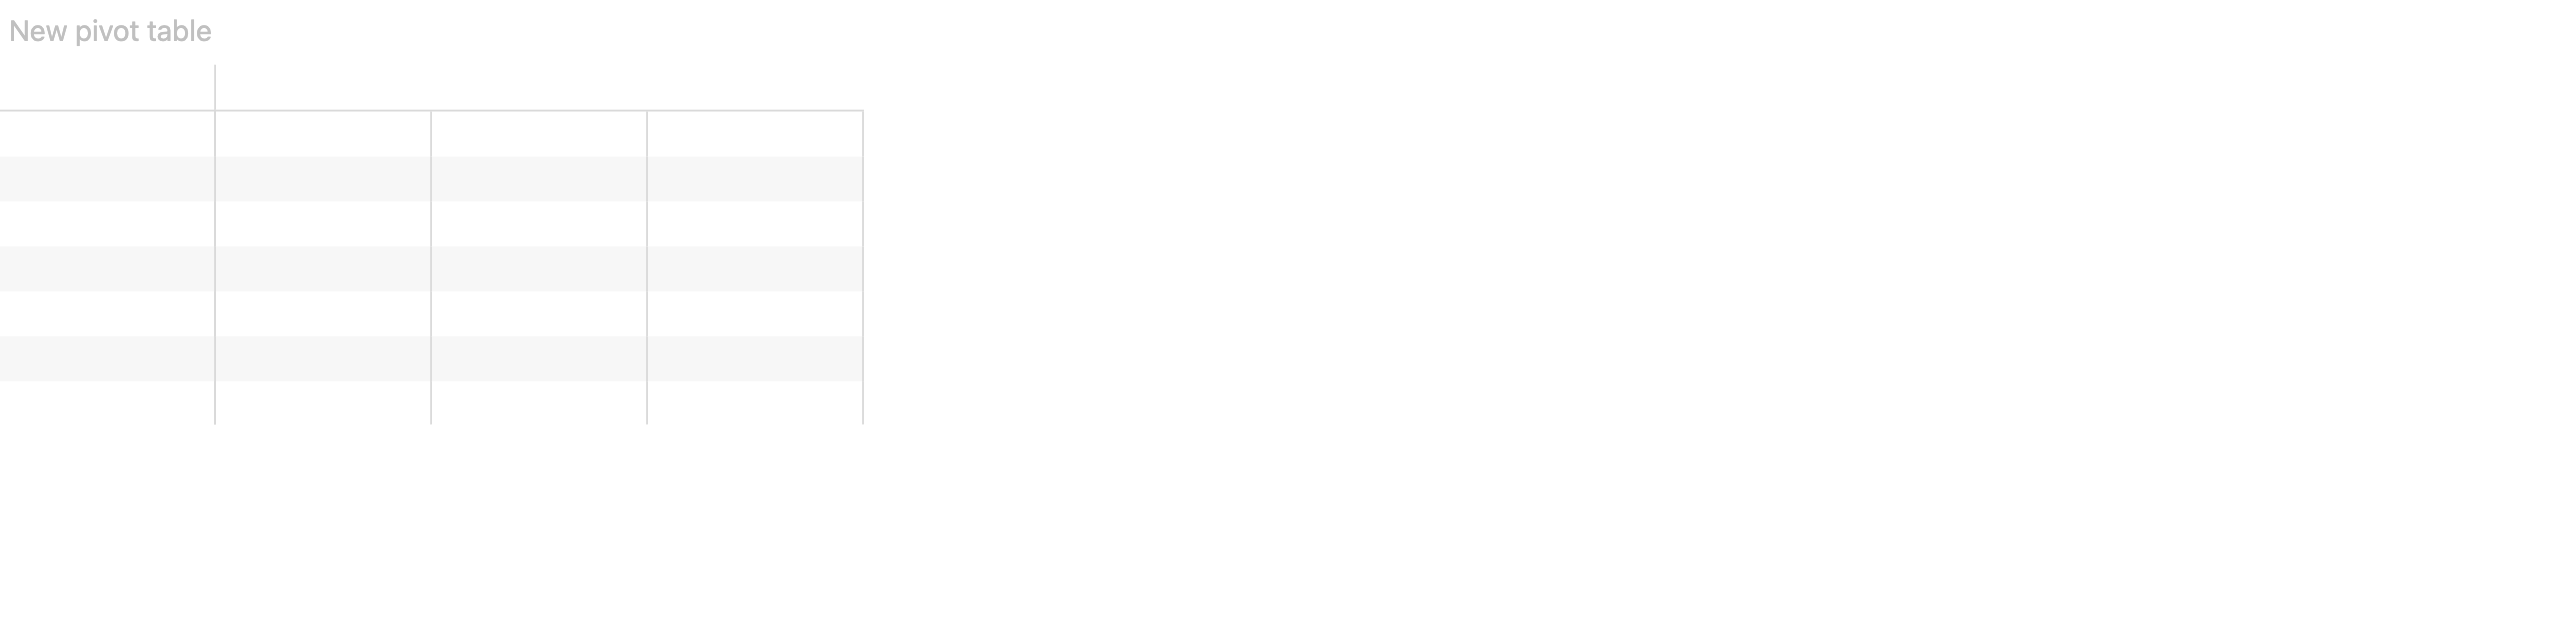

In [38]:
session.widget

In [39]:
del hierarchies["ProductCategory"]
del hierarchies["ProductName"]

We can see that these hierarchies have been removed...

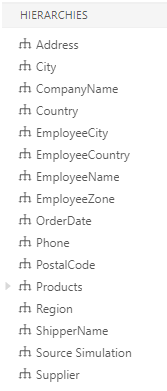

In [40]:
hierarchies

{('Products', 'Supplier'): <atoti.hierarchy.Hierarchy object at 0x136280810>, ('Orders', 'OrderDate'): <atoti.hierarchy.Hierarchy object at 0x13628a6d0>, ('Customers', 'Phone'): <atoti.hierarchy.Hierarchy object at 0x13628a810>, ('Customers', 'Address'): <atoti.hierarchy.Hierarchy object at 0x13628a950>, ('Products', 'Products'): <atoti.hierarchy.Hierarchy object at 0x1361dc890>, ('Customers', 'Region'): <atoti.hierarchy.Hierarchy object at 0x136287e50>, ('Employees', 'EmployeeCountry'): <atoti.hierarchy.Hierarchy object at 0x136287950>, ('Customers', 'PostalCode'): <atoti.hierarchy.Hierarchy object at 0x136287a10>, ('Employees', 'EmployeeCity'): <atoti.hierarchy.Hierarchy object at 0x136287b10>, ('Customers', 'Country'): <atoti.hierarchy.Hierarchy object at 0x136287890>, ('Shippers', 'Interval'): <atoti.hierarchy.Hierarchy object at 0x136287350>, ('Orders', 'OrderId'): <atoti.hierarchy.Hierarchy object at 0x136287490>, ('Customers', 'CompanyName'): <atoti.hierarchy.Hierarchy object at 0x136286ed0>, ('Orders', 'ShipperName'): <atoti.hierarchy.Hierarchy object at 0x136287110>, ('Employees', 'EmployeeName'): <atoti.hierarchy.Hierarchy object at 0x136287210>, ('Employees', 'EmployeeZone'): <atoti.hierarchy.Hierarchy object at 0x136286f90>, ('Customers', 'City'): <atoti.hierarchy.Hierarchy object at 0x136286b10>}

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
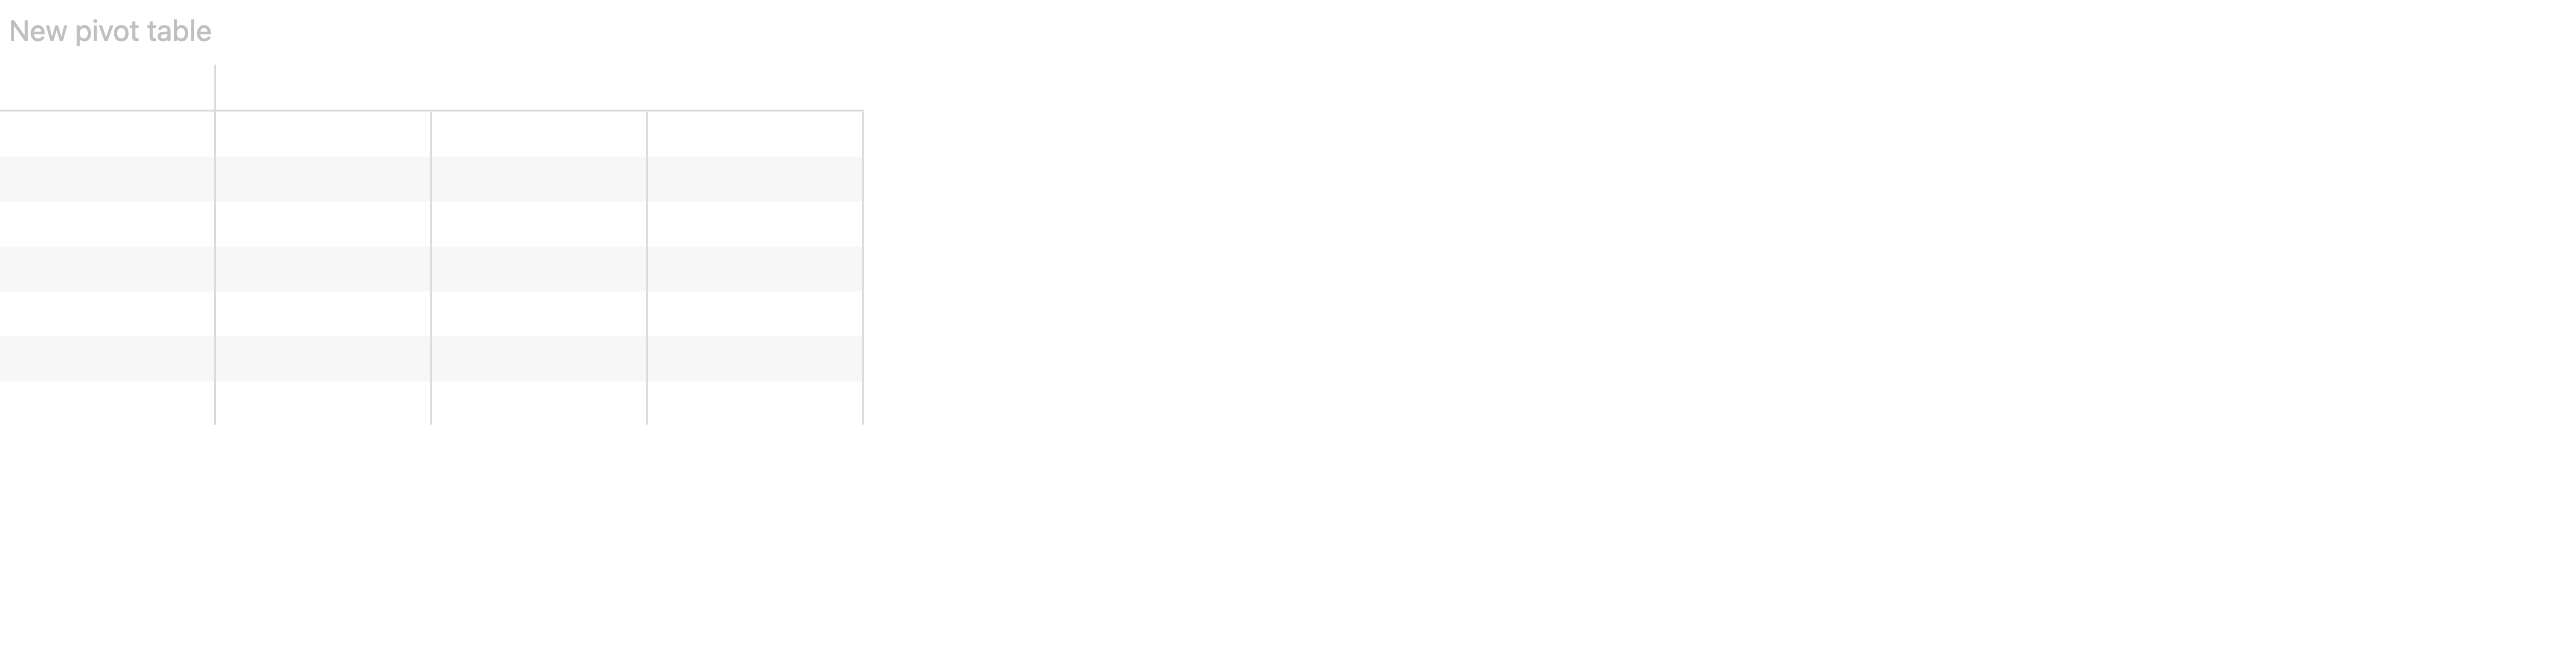

In [41]:
session.widget

We would probably want to do the same for the Employee-related hierarchies, creating a multi-level hierarchy with the following structure.

**EmployeesGeography** hierarchy
* EmployeeZone level
* EmployeeCountry level
* EmployeeCity level
    

In [42]:
hierarchies["EmployeesGeography"] = {
    "EmployeeZone": levels["EmployeeZone"],
    "EmployeeCountry": levels["EmployeeCountry"],
    "EmployeeCity": levels["EmployeeCity"],
}

In [43]:
del hierarchies["EmployeeZone"]
del hierarchies["EmployeeCountry"]
del hierarchies["EmployeeCity"]

In [44]:
hierarchies

{('Products', 'Supplier'): <atoti.hierarchy.Hierarchy object at 0x13627f790>, ('Orders', 'OrderDate'): <atoti.hierarchy.Hierarchy object at 0x1362686d0>, ('Customers', 'Phone'): <atoti.hierarchy.Hierarchy object at 0x13626b7d0>, ('Customers', 'Address'): <atoti.hierarchy.Hierarchy object at 0x13626b150>, ('Products', 'Products'): <atoti.hierarchy.Hierarchy object at 0x13626a8d0>, ('Customers', 'Region'): <atoti.hierarchy.Hierarchy object at 0x136279690>, ('Customers', 'PostalCode'): <atoti.hierarchy.Hierarchy object at 0x13627ac10>, ('Customers', 'Country'): <atoti.hierarchy.Hierarchy object at 0x13627a990>, ('Shippers', 'Interval'): <atoti.hierarchy.Hierarchy object at 0x136278750>, ('Orders', 'OrderId'): <atoti.hierarchy.Hierarchy object at 0x13627bd10>, ('Customers', 'CompanyName'): <atoti.hierarchy.Hierarchy object at 0x13627b050>, ('Orders', 'ShipperName'): <atoti.hierarchy.Hierarchy object at 0x136279fd0>, ('Employees', 'EmployeeName'): <atoti.hierarchy.Hierarchy object at 0x13627a050>, ('Customers', 'City'): <atoti.hierarchy.Hierarchy object at 0x136278c90>, ('Employees', 'EmployeesGeography'): <atoti.hierarchy.Hierarchy object at 0x13627b290>}

We can now see this EmployeesGeography multi-level hierarchy when we visualize the cube:

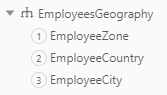

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
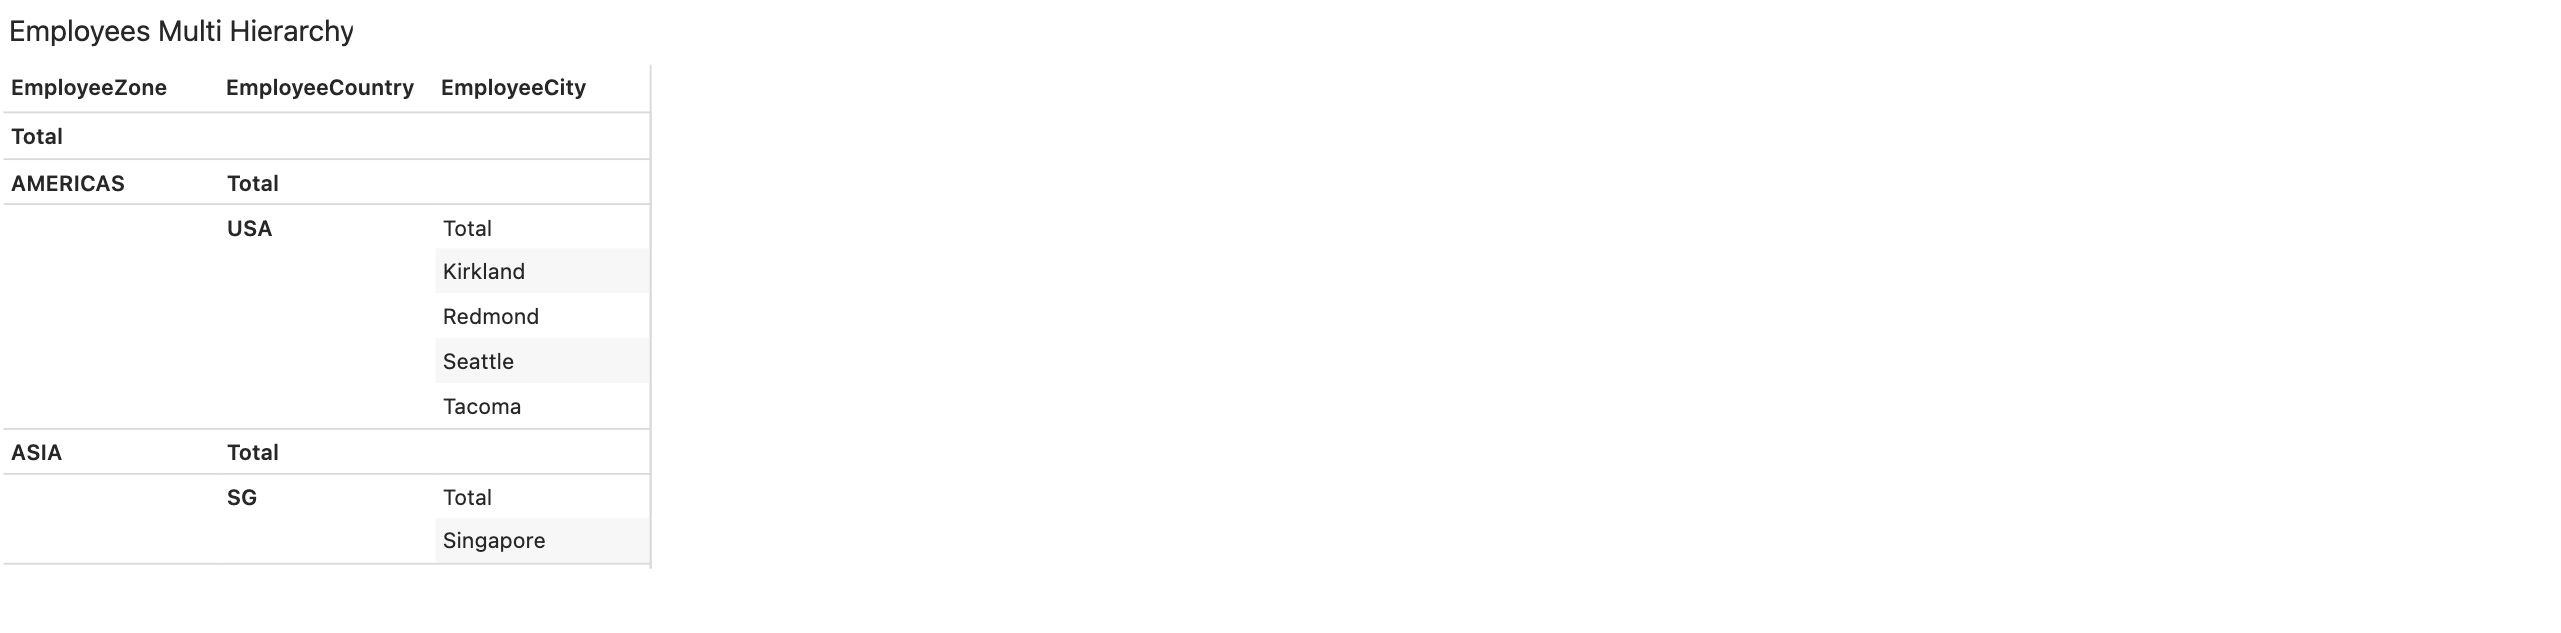

In [45]:
session.widget

One other typical use-case for multi-level hierarchies is with dates. We may wish to bucket dates firstly into YEARS, then QUARTERS, then MONTHS, and then the actual date. This will allow us to see measures across years, but then give us the ability to drilldown further into quarters of particular years.

We can do this with date columns by using the [create_date_hierarchy](https://docs.atoti.io/latest/api/atoti.Cube.create_date_hierarchy.html#atoti.Cube.create_date_hierarchy) method on a cube...

In [46]:
cube.create_date_hierarchy(
    "YQM",  # the new hierarchy name
    column=orders["OrderDate"],  # the table column containing date data
    levels={
        "Year": "yyyy",  # this defines the level and the part of the column's LocalDate object to take as a value
        "Quarter": "QQQ",
        "Month": "MMM",
    },
)

We now have a new YQM multi-level hierarchy where we can drilldown into the different buckets, or view data at different levels.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
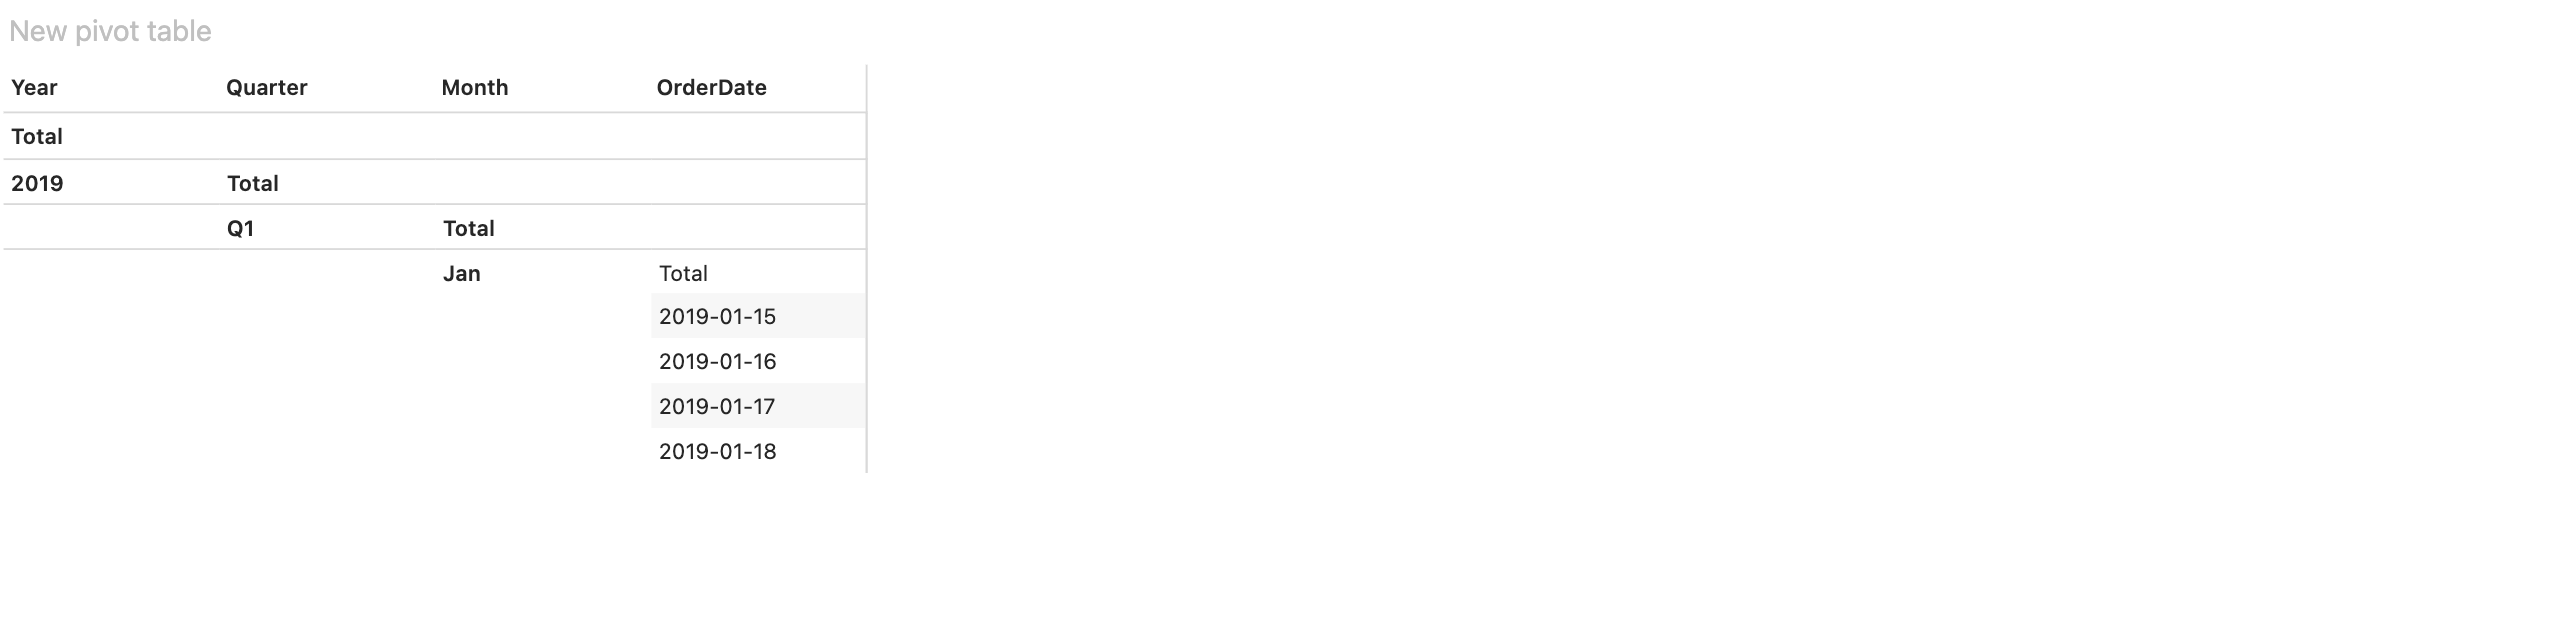

In [47]:
session.widget

## Creating Measures

See the [atoti.measure](https://docs.atoti.io/latest/api/atoti.Measure.html#atoti.Measure) and [atoti.agg](https://docs.atoti.io/latest/api/atoti.agg.html) packages for a full list of features.

So far, the cube is created using the default set of measures using SUM and MEAN on the numerical columns.

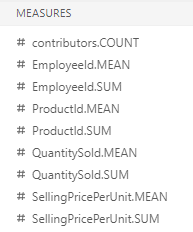

Note also that there is a "contributors.COUNT" measure. This is the number of facts from the base store that contribute to any cell on a pivot table. If we create a pivot table with only this measure, it will show the total number of facts from this base store.

### Removing unwanted measures

We can remove measures that we are not interested in, say the MEAN measures...

In [48]:
del measures["QuantitySold.MEAN"]
del measures["SellingPricePerUnit.MEAN"]

These measures are no longer present:

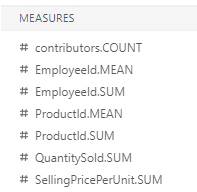

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
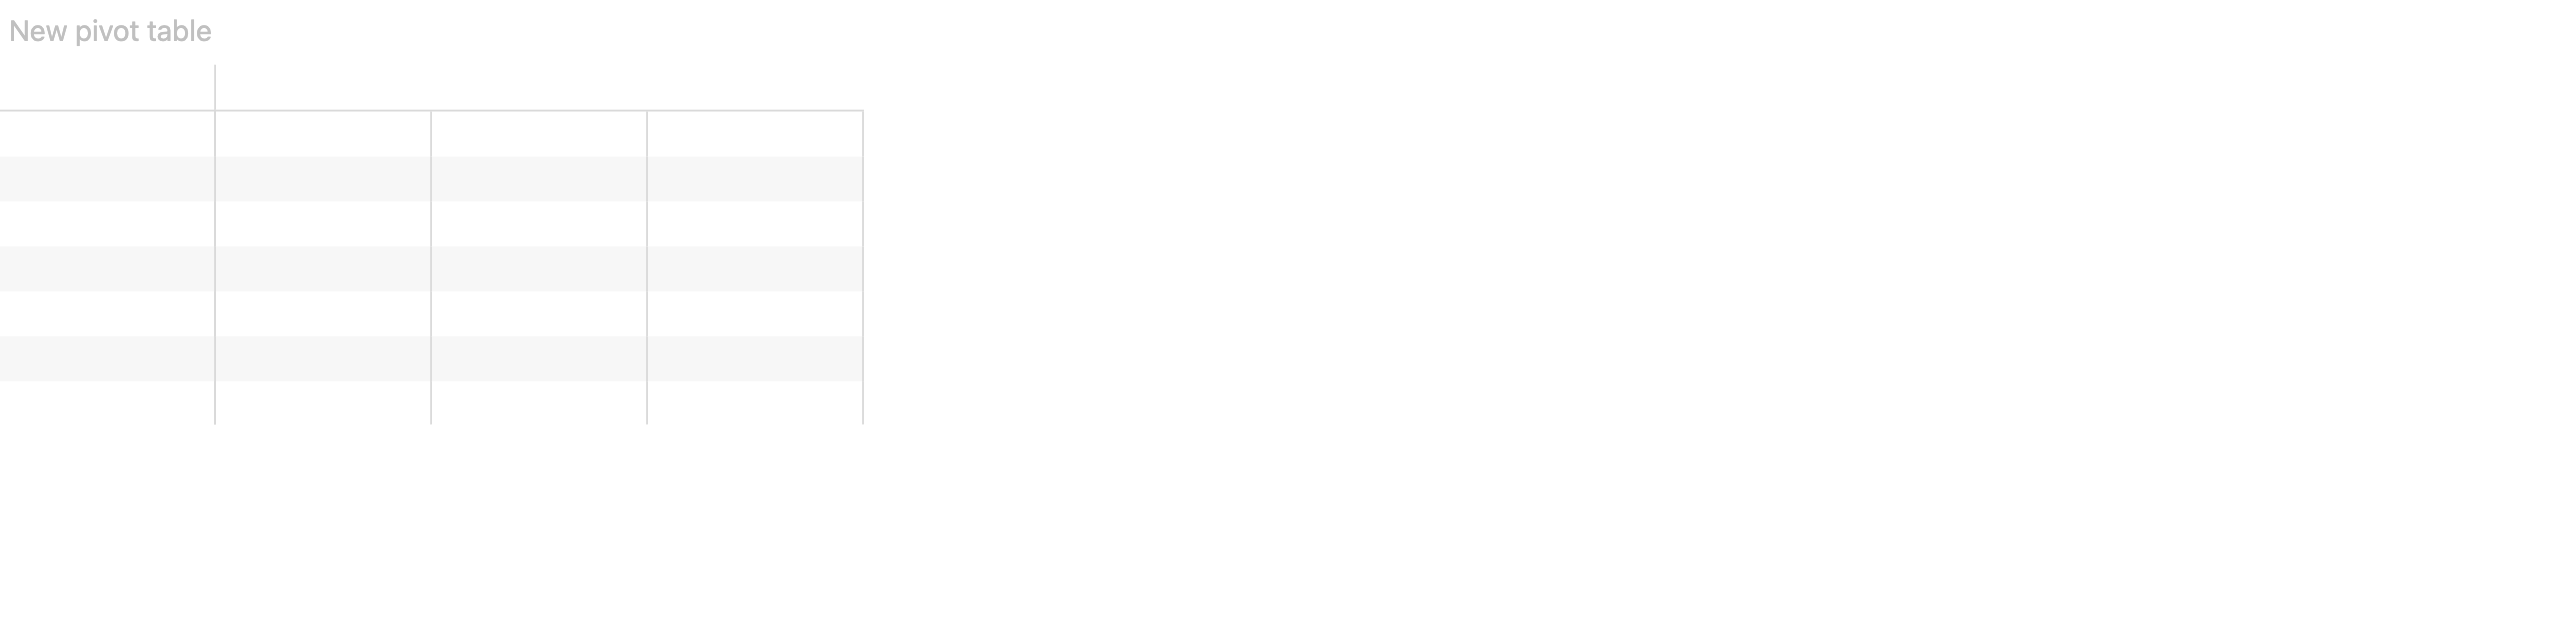

In [49]:
session.widget

### Dynamic aggregation measures at a specific level

We can see there are two measures called "QuantitySold.SUM" and "SellingPricePerUnit.SUM". These are columns that have been aggregated from the base store, Orders. If we wanted to see the actual sales value for each order, we would need to multiple both of these to obtain a new "Sales" amount measure (a cash value).

We could create such a measure as follows.

In [50]:
measures["Sales"] = tt.agg.sum(
    measures["QuantitySold.SUM"] * measures["SellingPricePerUnit.SUM"],
    scope=tt.OriginScope(levels={levels["ProductName"]}),
)

We are essentially doing a SUM aggregation by multiplying both of these measures. But this value only makes sense at a ProductName level, so the aggregation is done at this level by specifying the "scope" of this new measure. The aggregation is automatically split by ProductName to calculate the measure value, and then summed to the ProductCategory level.

Even if the Products hierarchy is not present in your pivot table, this scoping will still be done. This is known as dynamic aggregation.

Let's now see this measure in the cube.

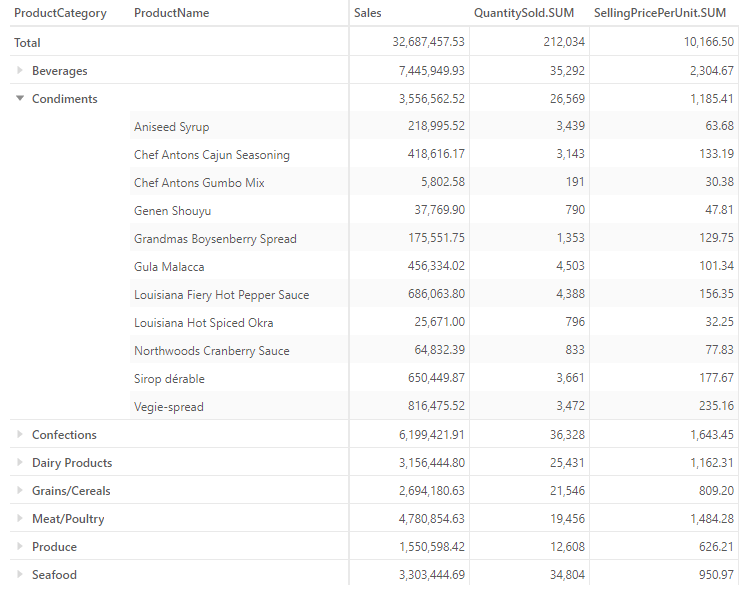

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
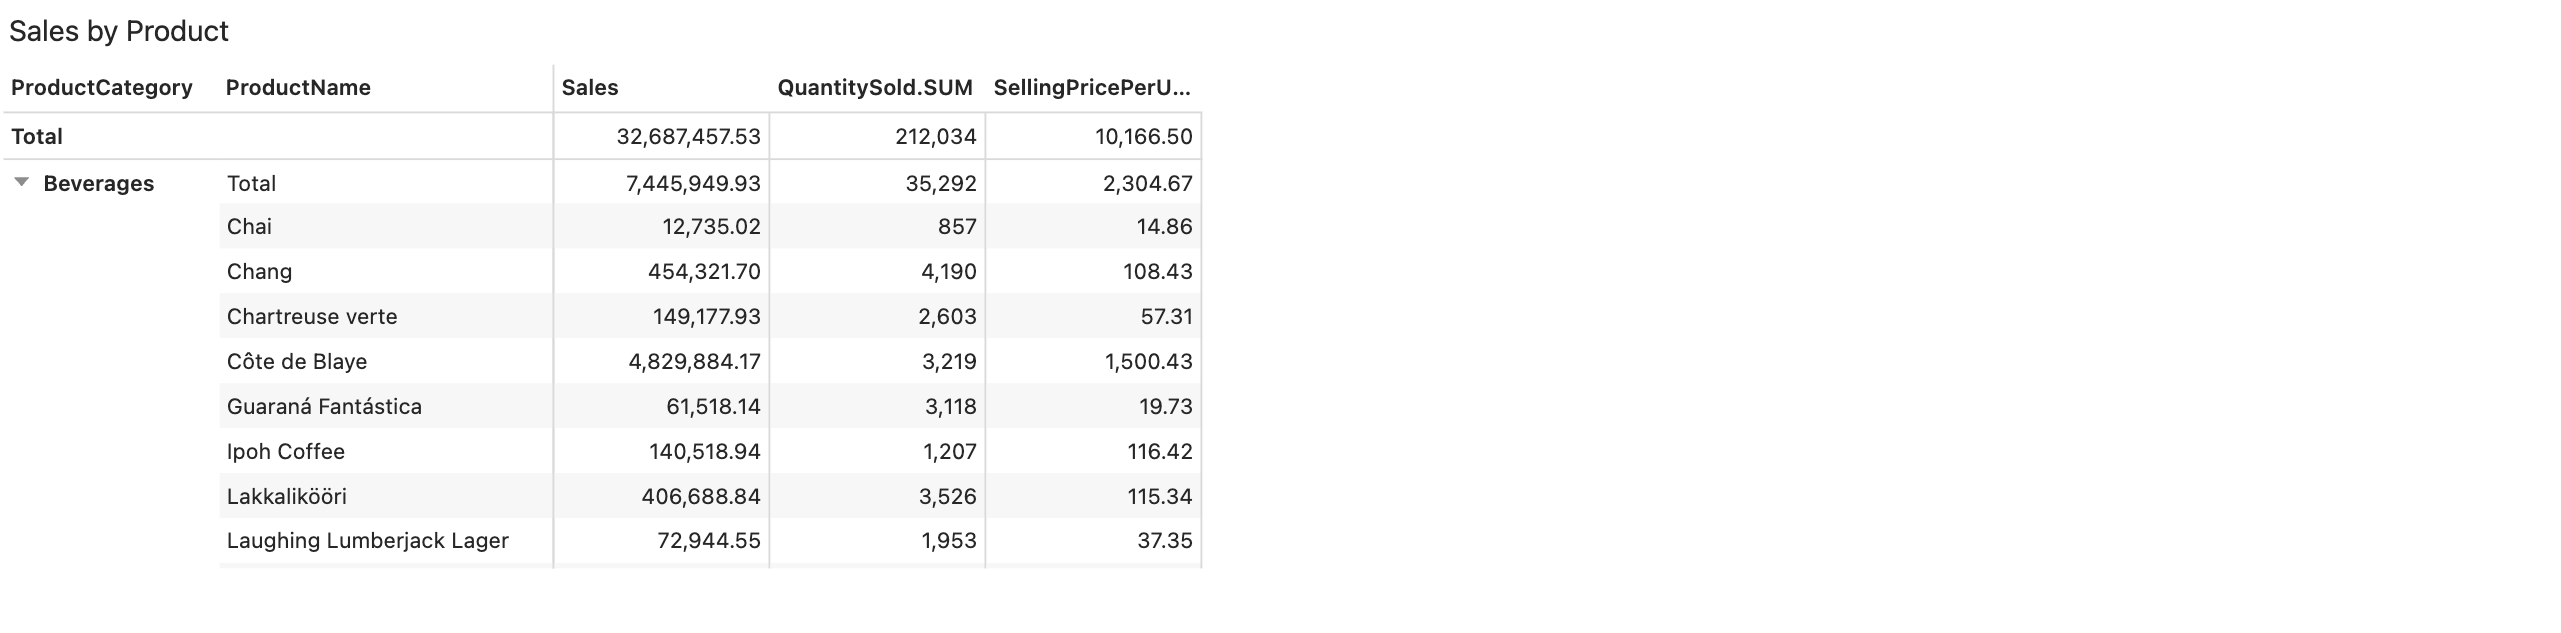

In [51]:
session.widget

If we look at the two highlighted cells for QuantitySold.SUM and SellingPricePerUnit.SUM, these are at the ProductCategory level, and their multiplication will give the value 31,495,158.29.


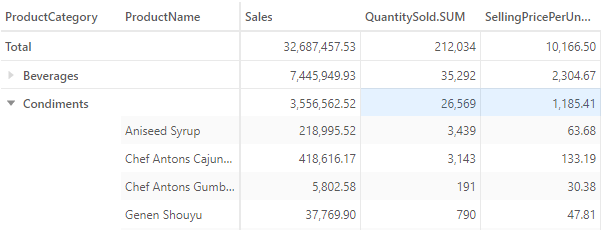

This is clearly wrong because the SellingPricePerUnit only applies for a specific ProductName.
The SellingPricePerUnit for Louisiana Hot Spiced Okra will be different to that for Vegie-spread.
Consequently, the calculation must be done per ProductName per ProductCategory, and then aggregated up.


An altenative way to define this measure is to use the [sum_product](https://docs.atoti.io/latest/api/atoti.agg.sum_product.html#atoti.agg.sum_product) aggregation as follows.

In [52]:
measures["Sales2"] = tt.agg.sum_product(
    measures["QuantitySold.SUM"],
    measures["SellingPricePerUnit.SUM"],
    scope=tt.OriginScope(levels={levels["ProductName"]}),
)

### Controlling aggregation level visibility

If we consider the measures "SellingPricePerUnit.SUM" and "QuantitySold.SUM", they only make sense when seen at a ProductName level, not at the ProductCategory level as they apply to specific products.

We can create new measures that limit the visibility of the original measures to the ProductName level, returning null otherwise...

In [53]:
measures["SellingPricePerUnit"] = tt.where(
    ~levels["ProductName"].isnull(), measures["SellingPricePerUnit.SUM"]
)

measures["QuantitySold"] = tt.where(
    ~levels["ProductName"].isnull(), measures["QuantitySold.SUM"]
)

We can see how these versions of these measures return nothing at the ProductCategory level, whereas the original measures do...

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
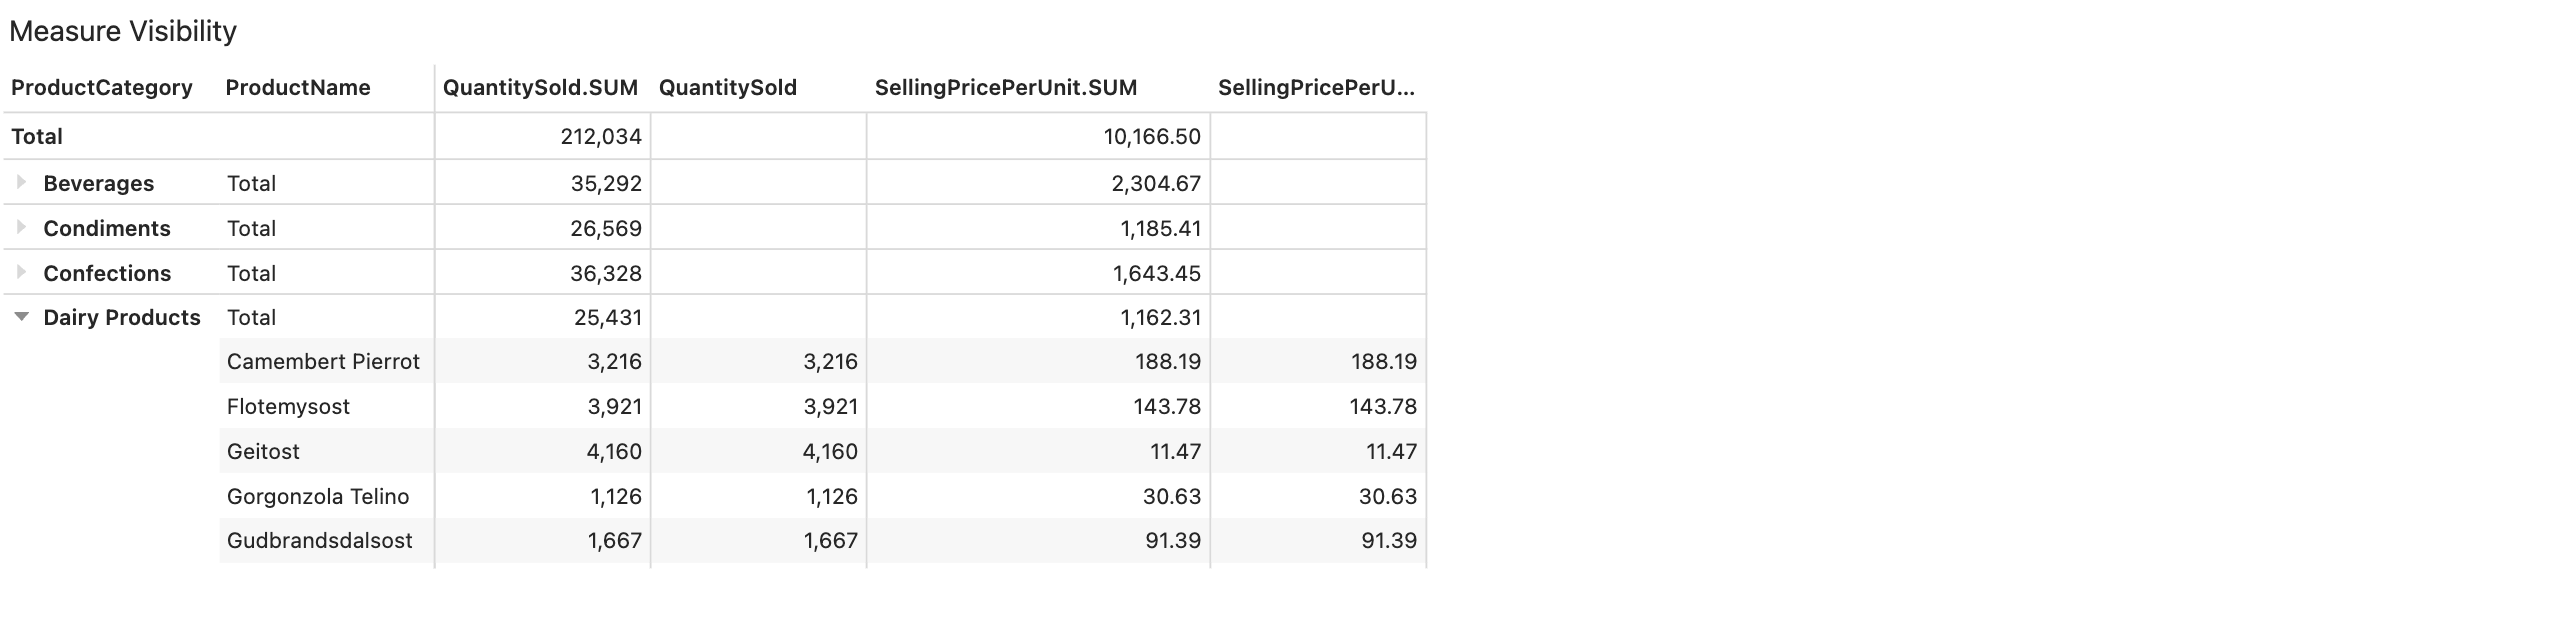

In [54]:
session.widget

### Date shifting and trend measures

We may want to compare measure values across a time/date hierarchy to see the differences on a daily basis. This essentially shows a trend across a timeline. We have the "OrderDate" hierarchy, so let's look at creating a Sales Trend measure where we can see the day-to-day differences in Sales.

* Firstly, we need the previous day's value of "Sales". Here we are shifting the OrderDate hierarchy and taking the value of the Sales measure.
* By default, the shift is done by 1 member, although it is possible to shift by more. Here we are using -1 to get the previous member.
* The natural ordering of dates will be in reverse order, so by getting the previous value will get the date from "yesterday" in effect.

In [55]:
previousSales = tt.shift(measures["Sales"], hierarchies["OrderDate"], offset=-1)

We can then compare this previous value with the current value and compute the difference...

In [56]:
measures["TrendSales"] = tt.where(
    ~previousSales.isnull(), measures["Sales"] - previousSales
)

💡 **Note:** We use "where" here because the oldest date won't have a previous value, so we need to check for nulls.

We can then chart this against the "OrderDate" hierarchy. We can further split this line chart by EmployeeName to monitor the trend in sales for each employee.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
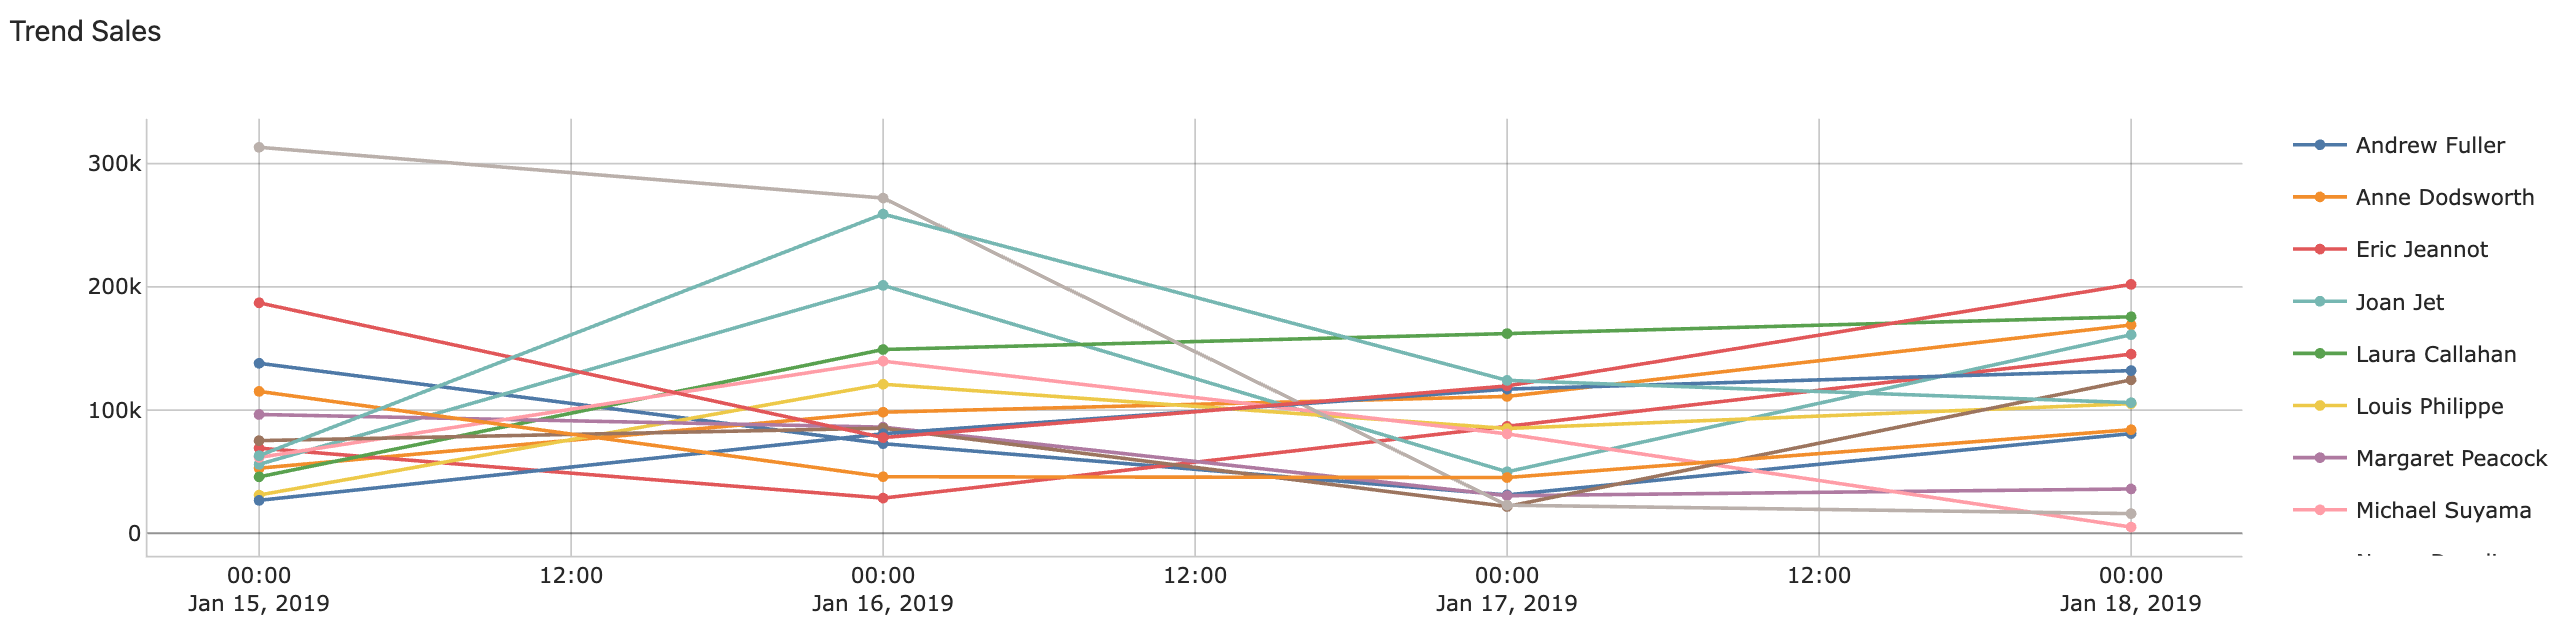

In [57]:
session.widget

### Cumulative measures and running totals

We may wish to see running or cumulative measure values. For example, the total Sales across a date range.

We can do this by creating a new measure with a "CumulativeScope" on a date hierarchy.

In [58]:
measures["RunningSales"] = tt.agg.sum(
    measures["Sales"], scope=tt.CumulativeScope(level=levels["OrderDate"])
)

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
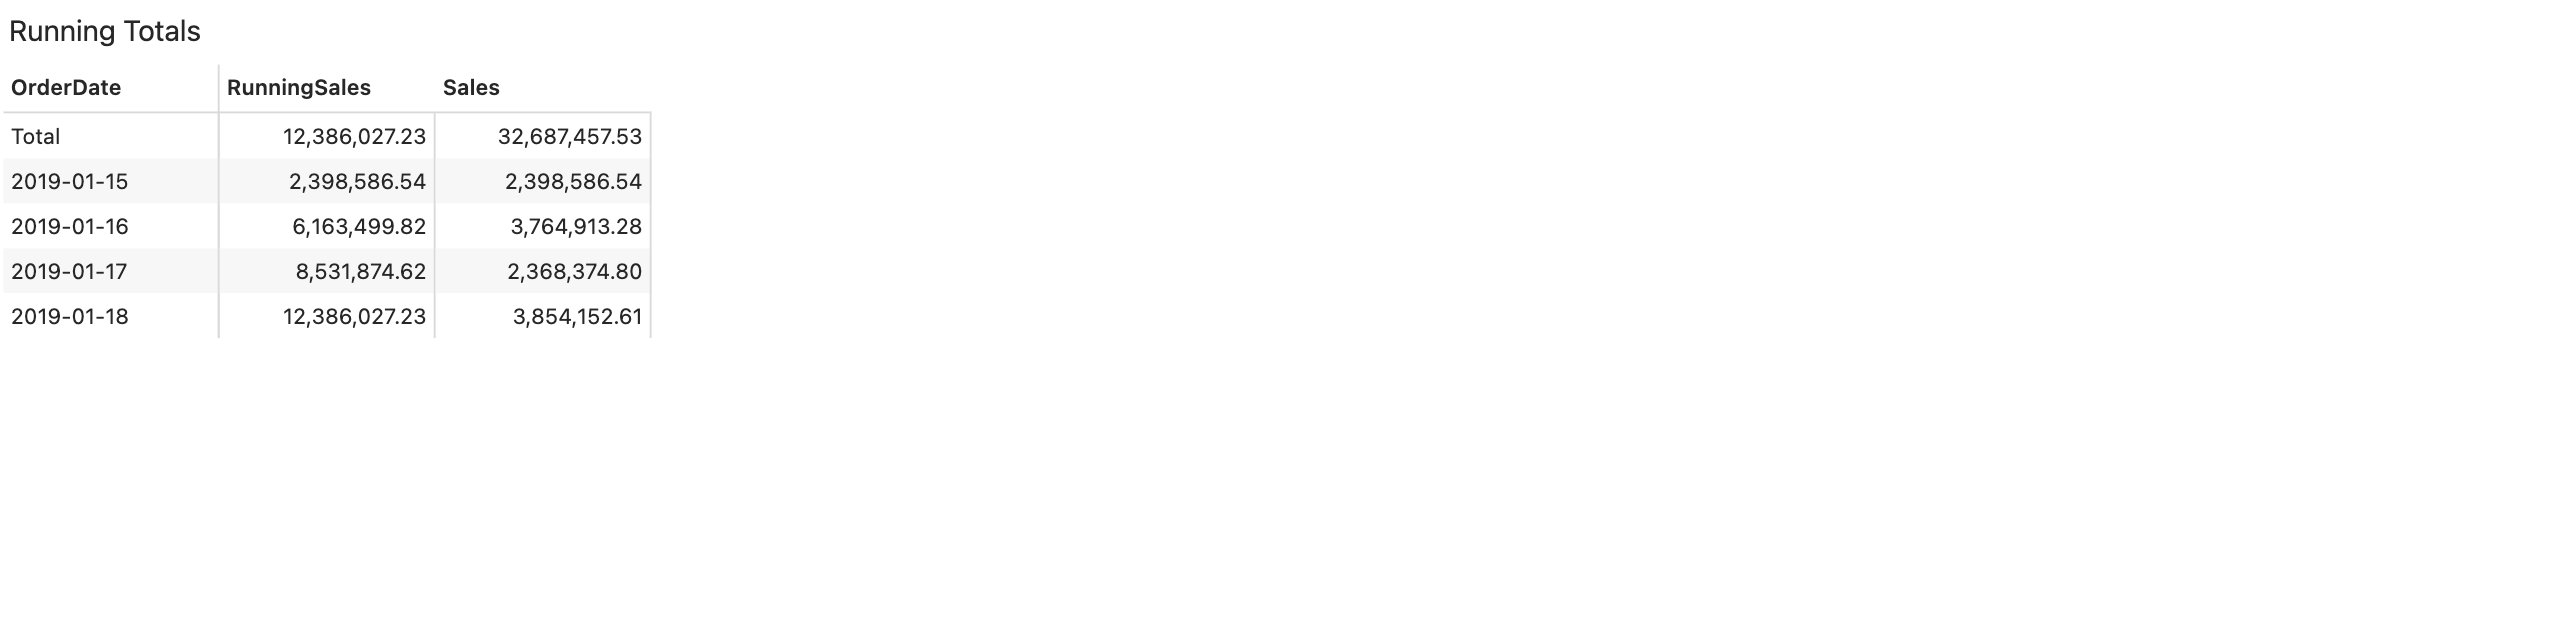

In [59]:
session.widget

The RunningSales is the cummulative amount of Sales over the dates.

By highlighting two Sales cells, it gives us the sum for those cells of 6,163,499.82, which is the RunningSales value at that date...

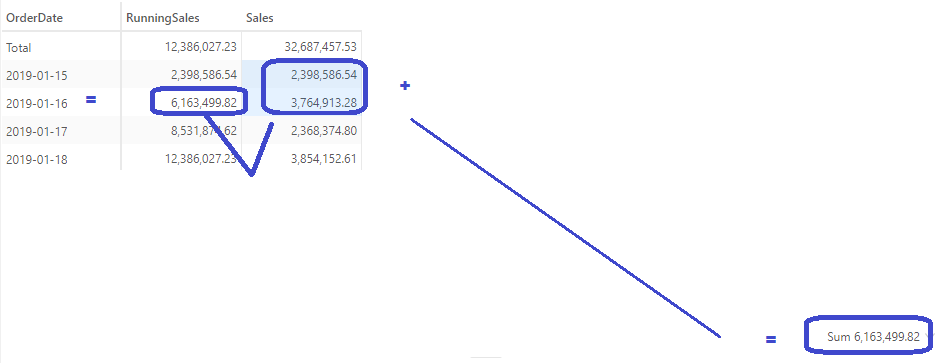



### Ratio Measures against a Parent value

We may also wish to see the proportion of Sales for each product in each category.

To do this, we can access the parent value of the ProductName level (the ProductCategory), and compute the ratio for each ProductName against this. Here we want to get the parent value of Sales on the Products hierarchy, one level up from the ProductName level, the ProductCategory level. If we specified 2 degrees, it will take the value of the Total across all Products, the AllMember.


In [60]:
measures["Sales Ratio"] = measures["Sales"] / tt.parent_value(
    measures["Sales"], degrees={hierarchies["Products"]: 1}
)
measures["Sales Ratio"].formatter = "DOUBLE[0.00%]"

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
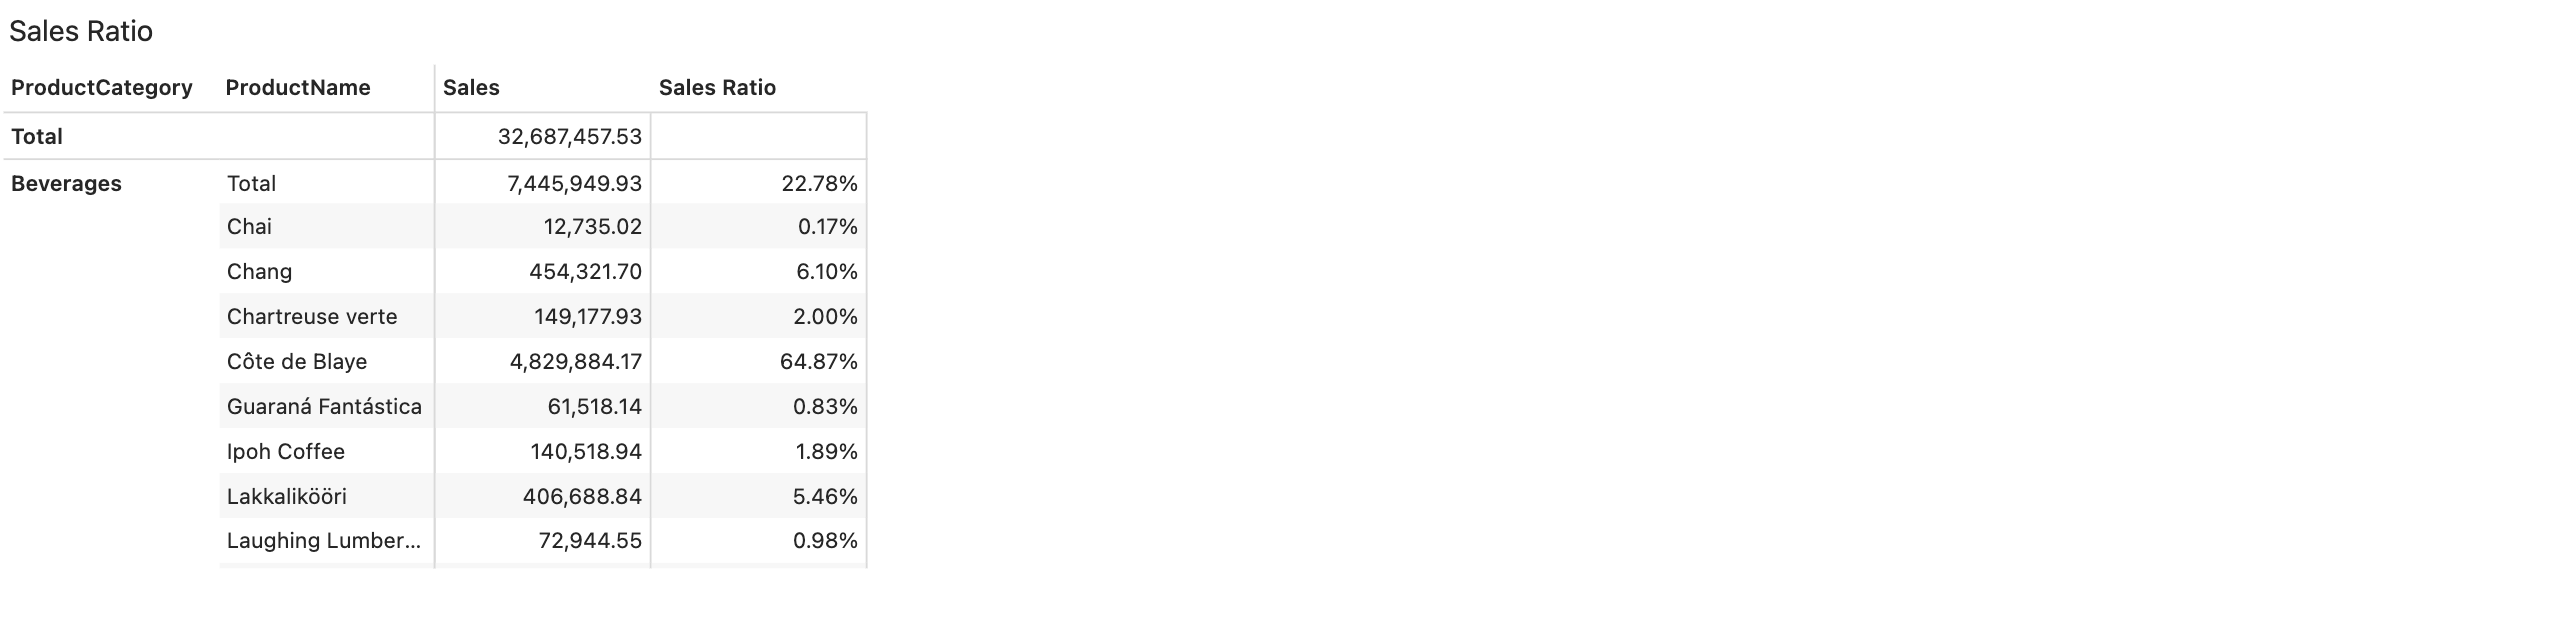

In [61]:
session.widget

### Aggregating and using vectors

A key feature of **Atoti** is that can natively aggregate arrays of numbers, or vectors. This saves memory by only requiring one record for all values instead of one record per value. Merely aggregating a vector doesn't give us much unless we are able to manipulate these aggregated vectors...

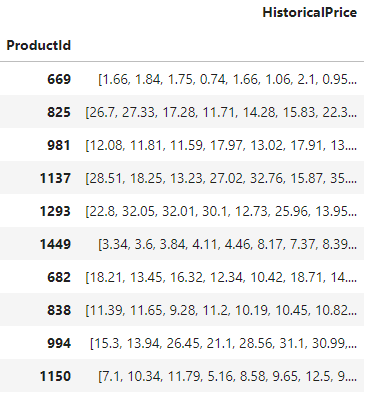


Fortunately, **Atoti** has a range of vector manipulation methods at our disposal.

The following measure definition will:

* Give the mean average value of the 20 largest values.
* Give the mean average value from the aggregated vector.

In [62]:
measures["AverageHistoricalPriceOfLargest20"] = tt.array.mean(
    tt.array.n_greatest(
        tt.agg.sum(
            tt.agg.single_value(historicalPrices["HistoricalPrice"]),
            scope=tt.OriginScope(levels={levels["ProductName"]}),
        ),
        n=20,
    )
)

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
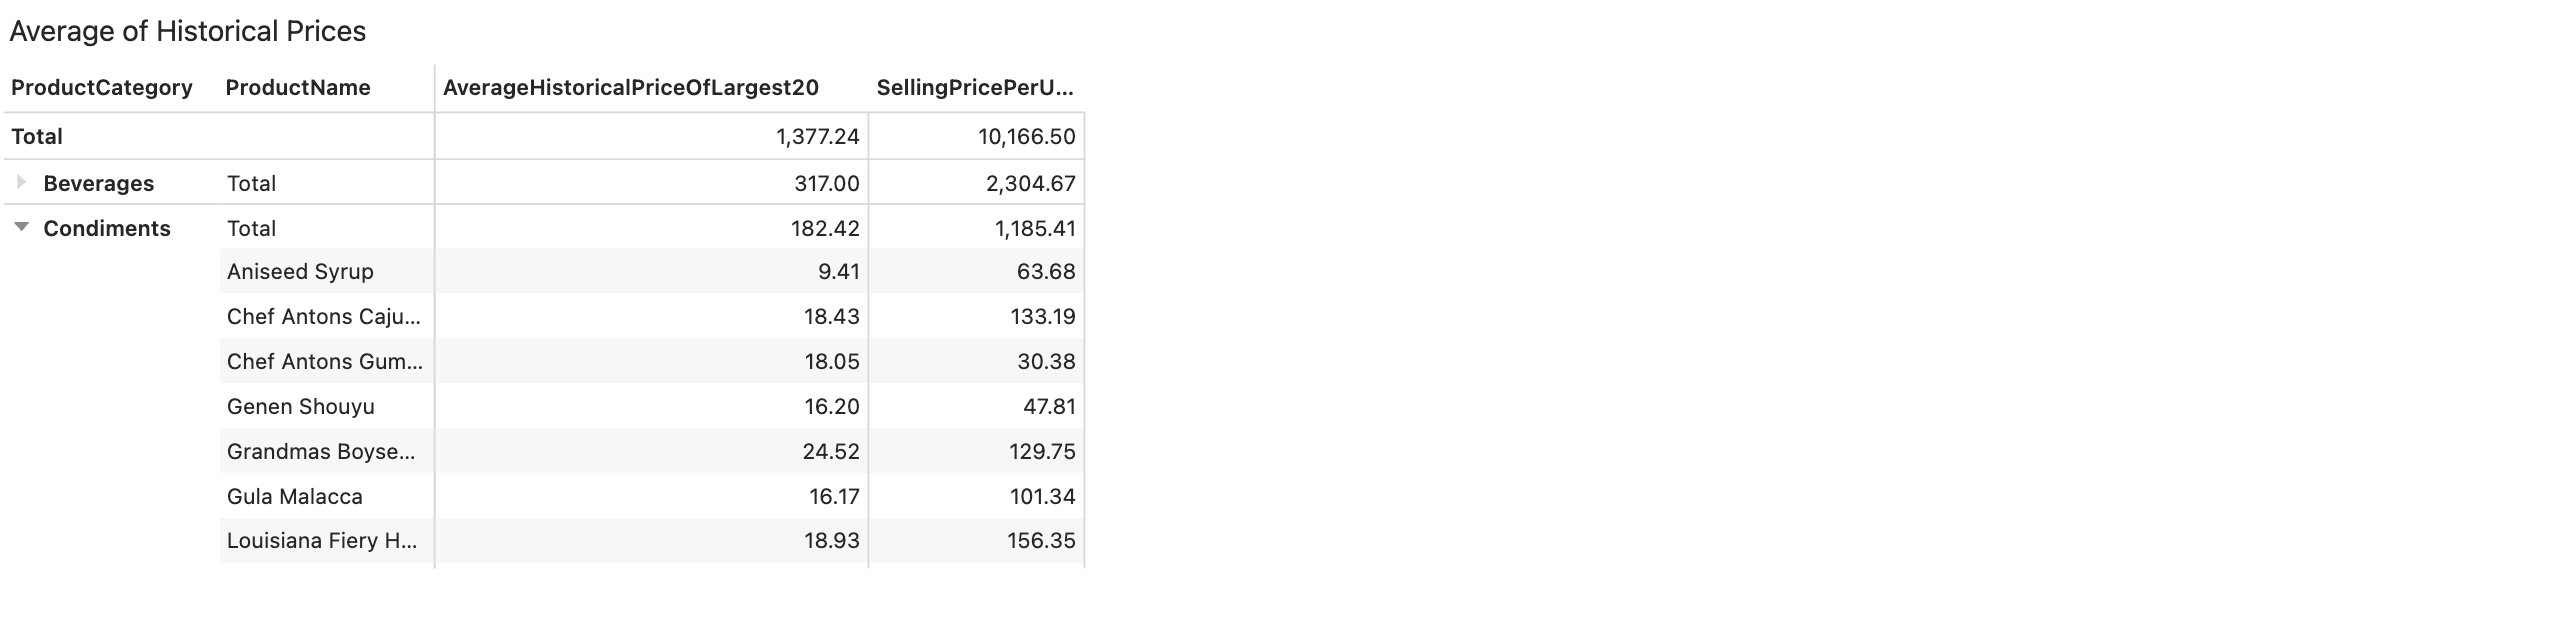

In [63]:
session.widget

We could also use a quantile to get the 95th lowest price from the whole aggregated vector in the following way...

In [64]:
measures["LowestHistoricalPriceAt95"] = tt.array.quantile(
    tt.agg.sum(
        tt.agg.single_value(historicalPrices["HistoricalPrice"]),
        scope=tt.OriginScope(levels={levels["ProductName"]}),
    ),
    q=0.95,
)

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
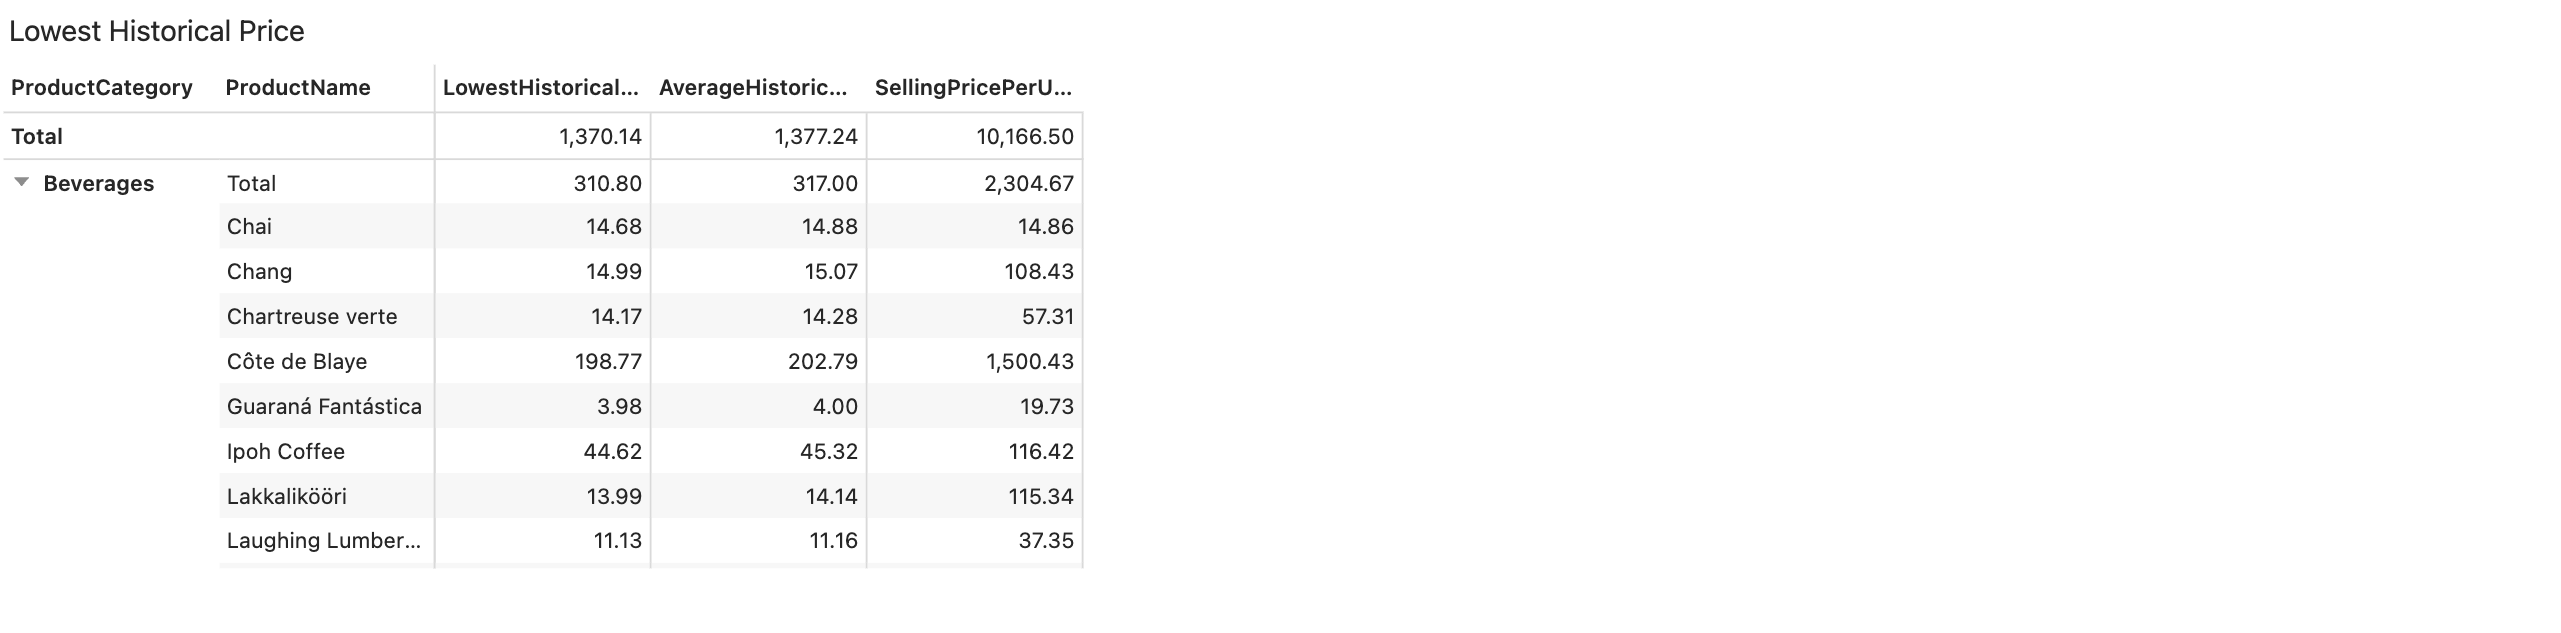

In [65]:
session.widget

This is a unique and key feature of **Atoti** and allows for **non-linear** aggregations to be made.  

In the finance world, Value-At-Risk is one such measure that works off vectors of historical or theoretical profit and loss values. P&L vectors are aggregated up to the appropriate level in a pivot table, then sorted from least to best, and then a percentile of this sorted vector is taken to represent the VaR.

This quantile is the percentage confidence level that such a loss could happen again. When used with historical P&L values per day, it reflects the worst loss that can be made based on what has previously happened over, say, the last 1000/2000 days.

You can see this is action in the [ValueAtRisk](https://github.com/atoti/notebooks/tree/main/notebooks/01-use-cases/finance/risk-management/market-risk/value-at-risk) notebook.

💡 **Note:** The **Atoti** array package can be explored here: [array_handling](https://docs.atoti.io/latest/api/atoti.array.html)

### Lookup measures

We saw earlier how we created a **many-to-many** join between Orders and Shippers.

This created a special kind of hierarchy called an **analysis hierarchy** which can only be used by specific measures that **know** about this. What we want to do is return the transport rate for each order depending on the quantity sold, and then return the cost of transporting these goods.


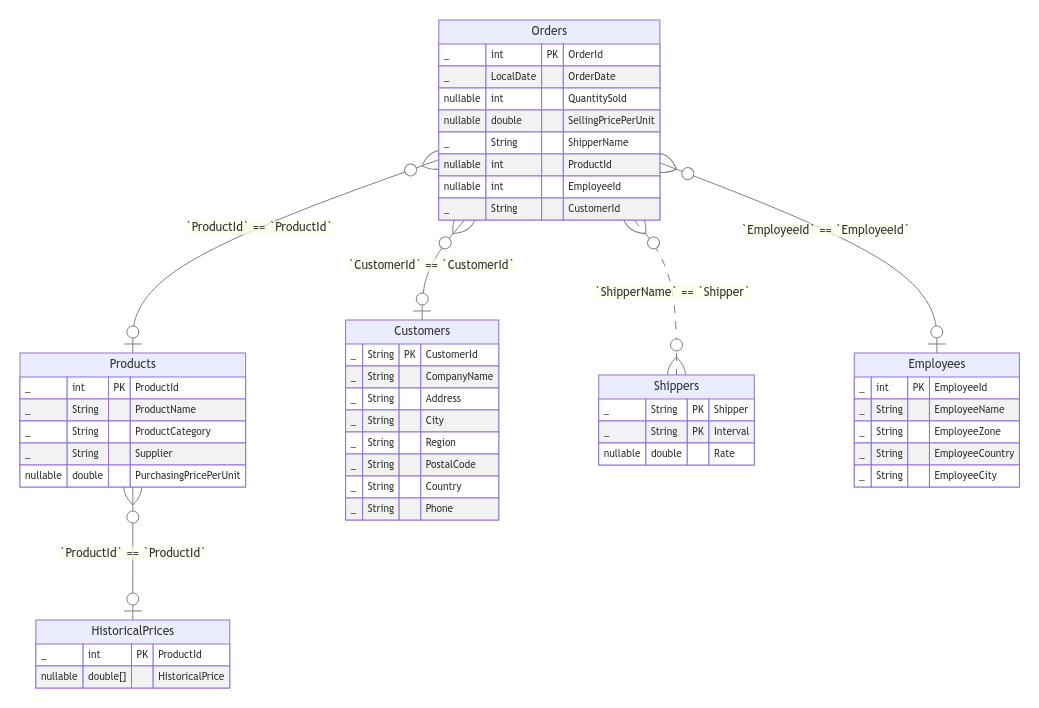

In [66]:
session.tables.schema

Based on the quantity sold, let's use the `where` function to map it to the corresponding shipment "interval"...

In [67]:
quantitySold = measures["QuantitySold.SUM"]

measures["interval"] = tt.where(
    (~levels["OrderId"].isnull()),
    tt.where(
        {
            (quantitySold > 0) & (quantitySold < 100): "Quantity less than 100",
            (quantitySold >= 100)
            & (quantitySold < 300): "Quantity between 100 and 300",
            (quantitySold >= 300)
            & (quantitySold < 500): "Quantity between 300 and 500",
            (quantitySold >= 500)
            & (quantitySold < 700): "Quantity between 500 and 700",
            quantitySold >= 700: "Quantity more than 700",
        },
        default="Unknown",
    ),
)

In essence, we have created an interval measure that is conditional on the quantity sold value to determine what the actual "Interval" is.

We can then look up the relevant rate accordingly...

In [68]:
measures["TransportRate"] = tt.lookup(
    shippers["Rate"],
    (shippers["Interval"] == measures["interval"])
    & (shippers["Shipper"] == levels["ShipperName"]),
)

Notice that we are looking up the shippers table for the Rate column value where the Shipper column value is the same as the current member of the ShipperName hierarchy level and the Interval column value is the same the current value of the Interval measure.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
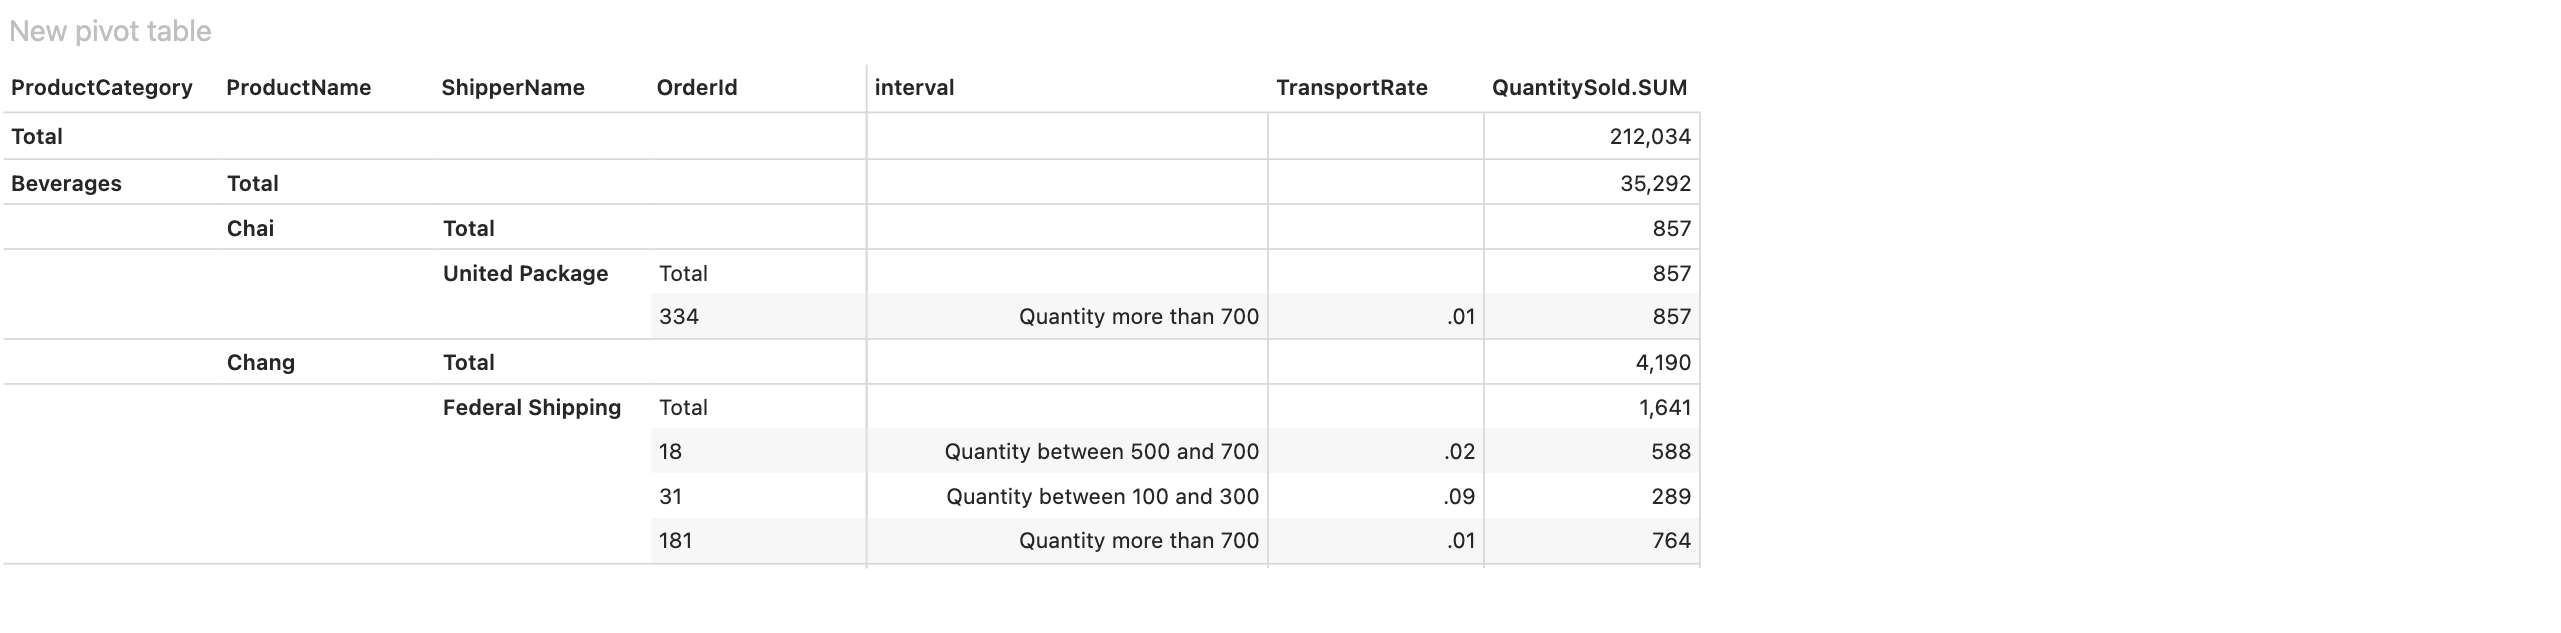

In [69]:
session.widget

And finally, we can create a measure that uses this rate and the quantity sold to give the cost of shipping this order...

In [70]:
measures["TransportCost"] = tt.agg.sum_product(
    measures["TransportRate"],
    measures["QuantitySold.SUM"],
    scope=tt.OriginScope(levels={levels["ShipperName"], levels["OrderId"]}),
)

We can now see how much each order cost to transport...

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
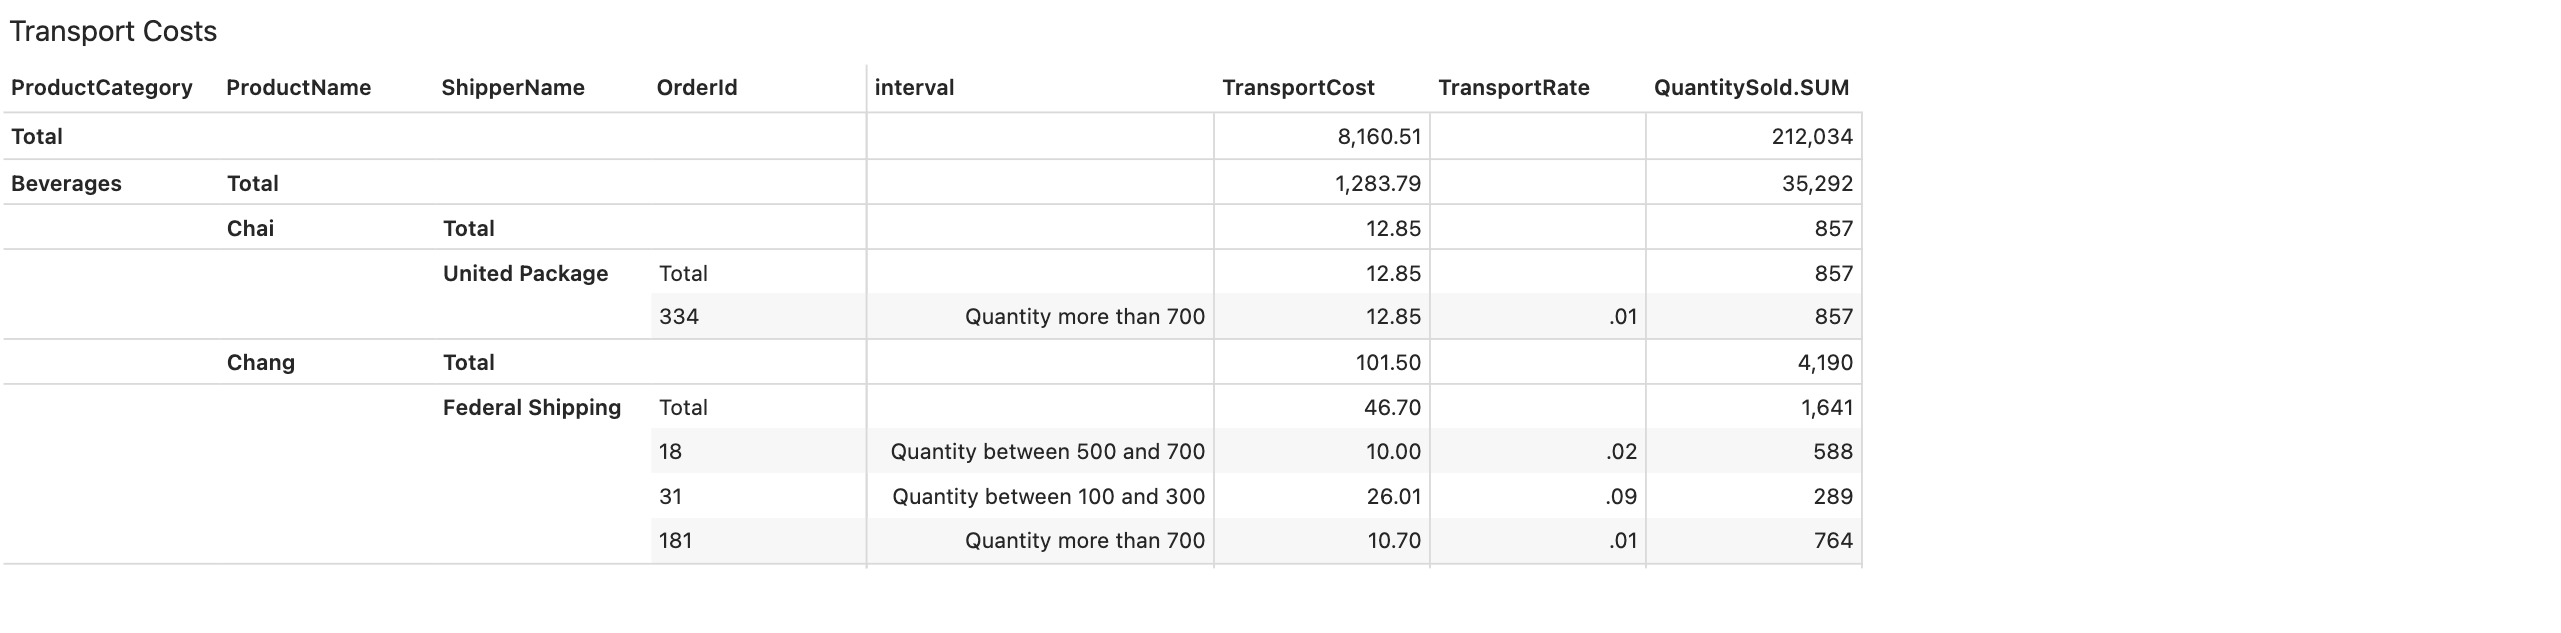

In [71]:
session.widget

Such a lookup is typical in many use-cases, especially where a currency conversion is required to convert to a base currency.

If the orders were all in different currencies, then we cannot aggregate the Sales amounts because Yen amounts cannot be aggregated with USD amounts. In such an example, we would need to specify the currency on each order row and link to a currency FX table in order to convert to the base currency.

You can see currency conversion notebook example here:  [currency conversion notebook](https://github.com/atoti/notebooks/tree/main/notebooks/02-technical-tutorials/currency-conv-with-weighted-ave)


## Simulations / What-ifs

### Source Simulations

Source simulations allow us to create and compare different **scenarios**, and enable **what-if** analysis.

Each scenario can be thought of as a separate versions of your data. We can make updates to the data in a particular scenario independently from the others. Any measures you have defined can be calculated separately for every scenario, and, because the scenarios are exposed as a hierarchy in the cube, we can compare the results of these measures between scenarios.

Let's start by creating a scenario that for now will mirror our existing "base" data...

In [72]:
session.create_scenario("Price Simulation")

In [73]:
session.scenarios

['Base', 'Price Simulation']

We can visualize this by adding the **Scenario** level of the **Source Simulation** hierarchy to a pivot table as shown below.

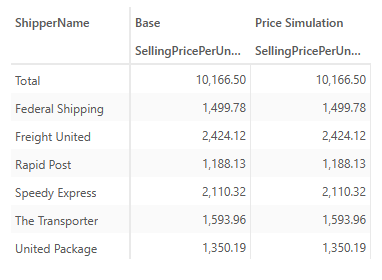

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
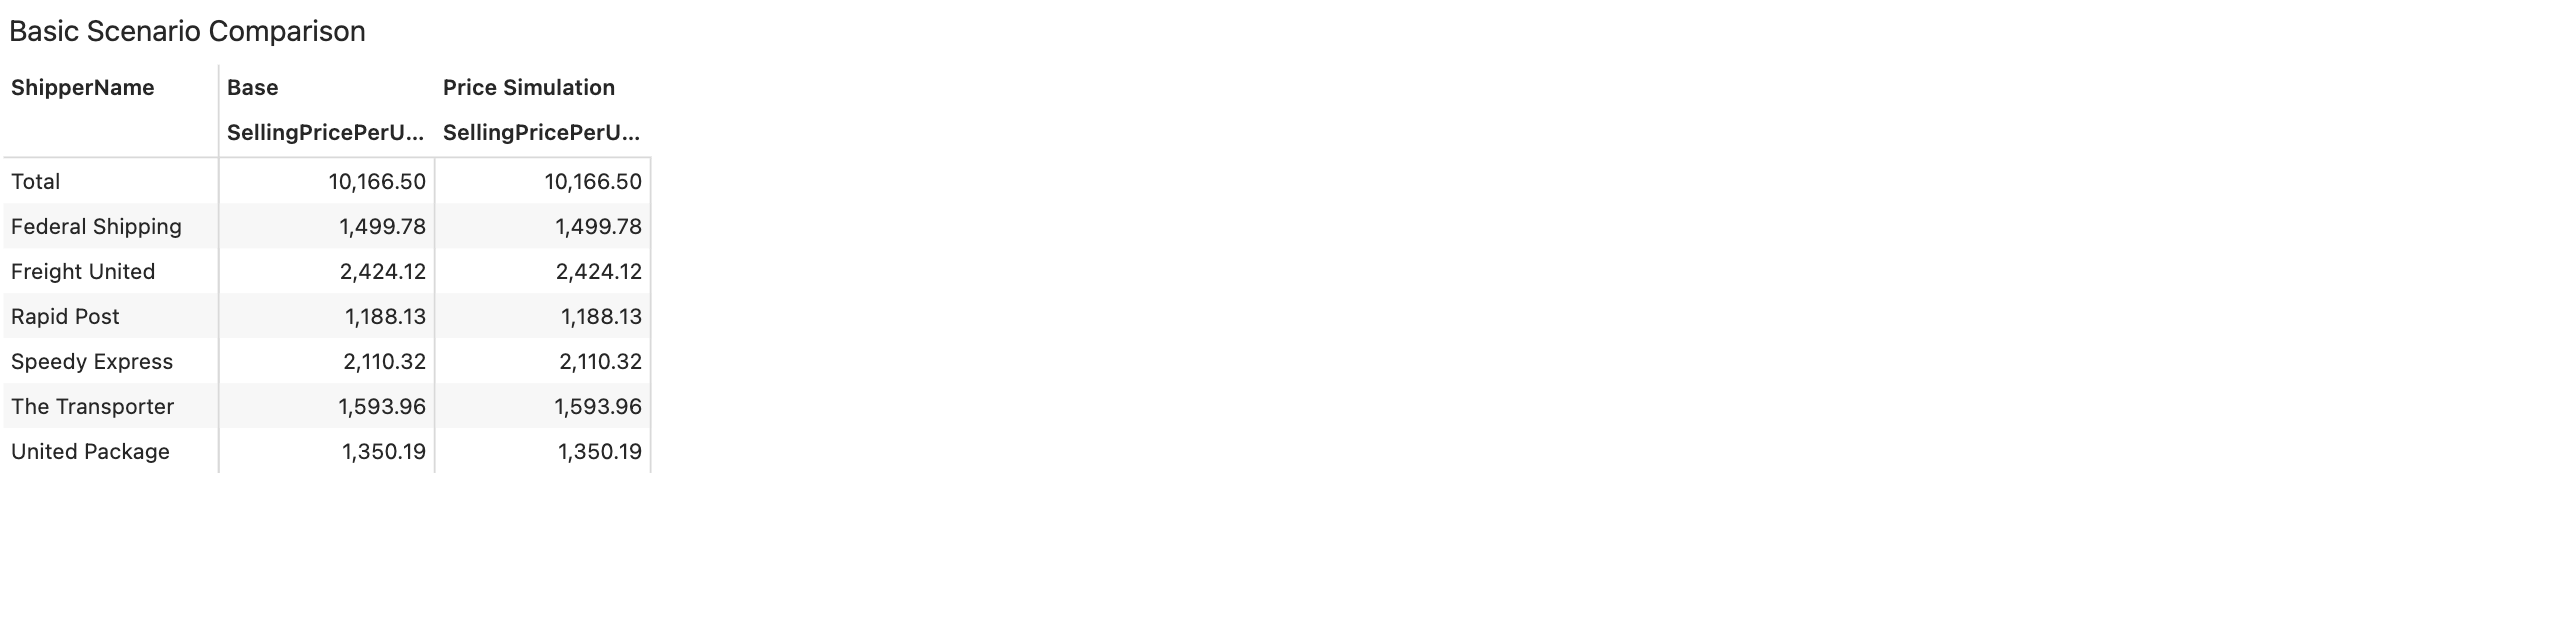

In [74]:
session.widget

Currently all the measure values between our scenarios are the same because they are based on the same underlying data.

Now that we have created a scenario we can modify it's data. First let's prepare some modified data where the SellingPricePerUnit of products from each shippers has been scaled...

In [75]:
scale_factor = {
    "Federal Shipping": 1.05,
    "Speedy Express": 2.0,
    "United Package": 0.5,
    "Rapid Post": 0.8,
    "Freight United": 1.25,
    "The Transporter": 1.1,
}

In [76]:
orders_df = pd.read_csv("data/Orders.csv", parse_dates=["OrderDate"], dayfirst=True)

In [77]:
for shipper, factor in scale_factor.items():
    orders_df.loc[orders_df["ShipperName"] == shipper, "SellingPricePerUnit"] *= factor

This new dataframe has applied the scaling factor to all the orders based on the particular shipper.

In [78]:
orders_df.head()

,OrderId,OrderDate,QuantitySold,SellingPricePerUnit,ShipperName,ProductId,EmployeeId,CustomerId
0,1,2019-02-18,650,28.025,Freight United,994,18336,c4411
1,2,2019-02-18,200,4.888,Rapid Post,1488,63528,c4299
2,3,2019-02-18,830,13.525,United Package,1137,18594,c4747
3,4,2019-02-18,14,56.020,Speedy Express,994,63528,c2171
4,5,2019-02-18,856,6.760,Rapid Post,1449,18508,c4691


We can then load our modified data into our new scenario or branch.

In [79]:
orders.scenarios["Price Simulation"].load_pandas(orders_df)

Visualizing this, we can add the **Source Simulation** what-if hierarchy to a pivot table in order to see the effect on the SellingPricePerUnit measure between the two branches (or scenarios).

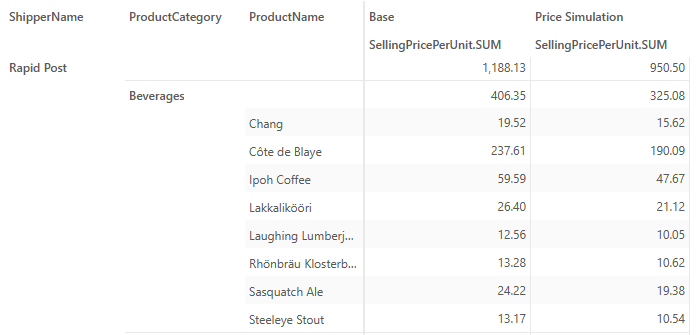

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
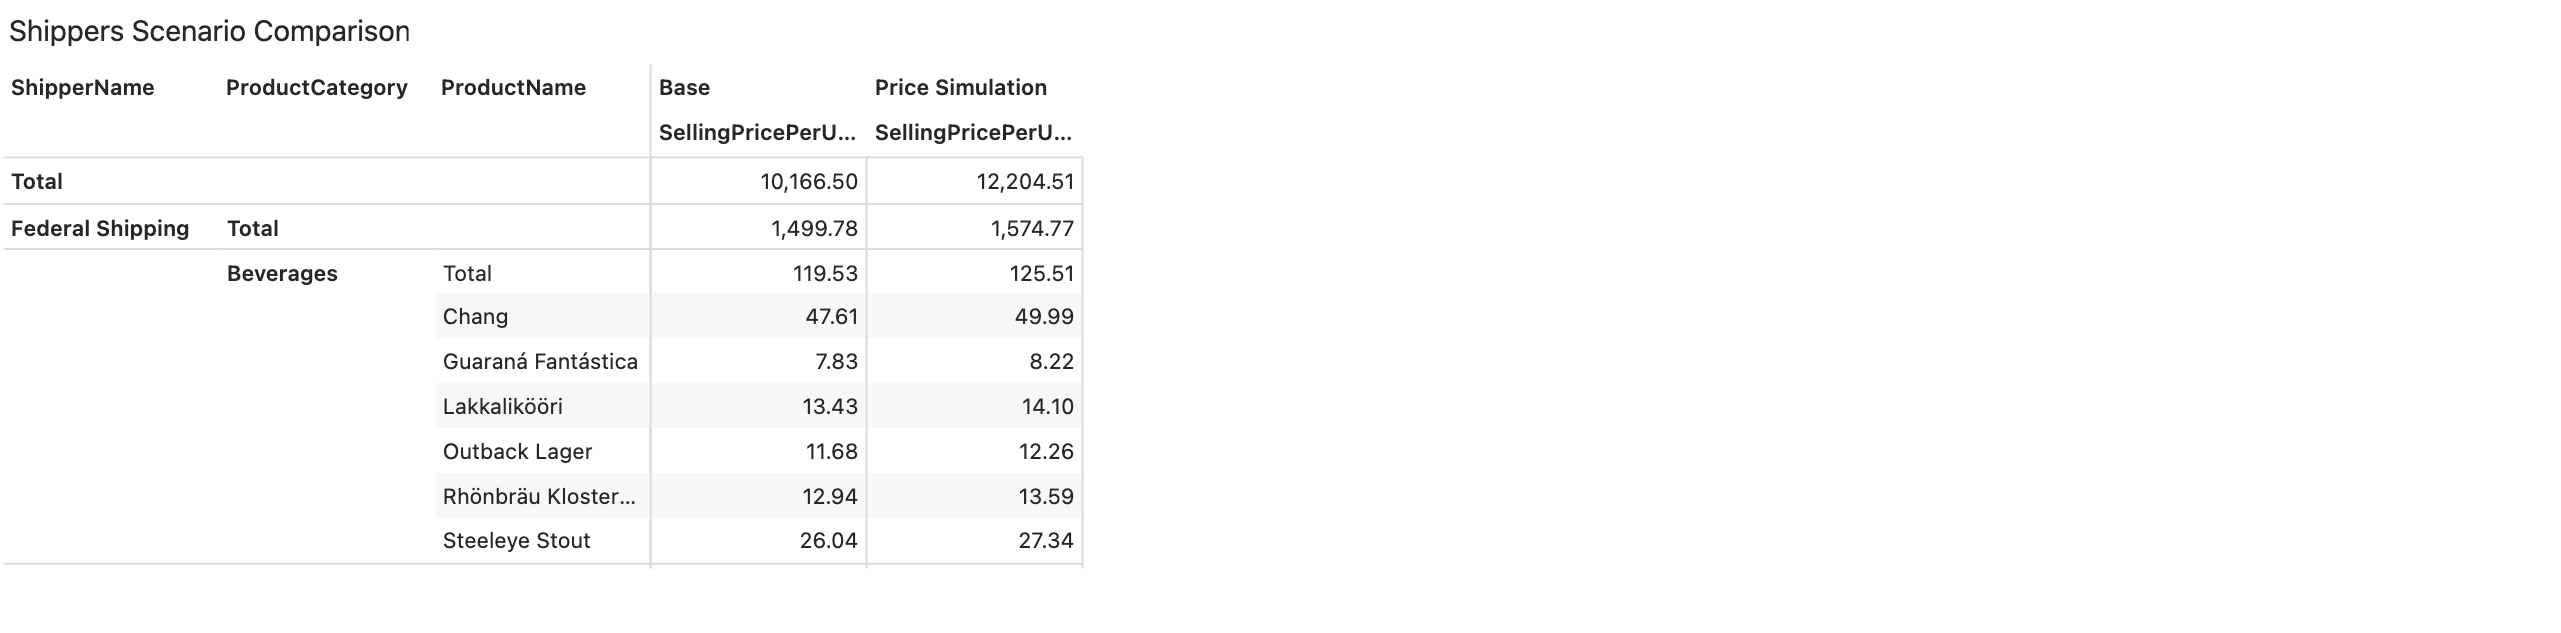

In [80]:
session.widget

## Querying the Cube

💡 **Note:** See [Cube operations](https://docs.atoti.io/latest/api/atoti.Cube.html) for more details.

We can also query the cube without having to use any of the UI widgets. The results will be returned as a [Pandas data frame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). As a simple example, let's say we wish to run a query returning two measures with two hierarchies on our pivot table, filtering on a specific Shipper...

In [81]:
queryResults = cube.query(
    measures["QuantitySold.SUM"],
    measures["Sales"],
    levels=[levels["ProductName"], levels["CompanyName"]],
    filter=levels["ShipperName"] == "Speedy Express",
    mode="raw",
)

The "raw" mode just returns the data in its raw state.
To prettify it, you can use the "pretty" mode.

In [82]:
queryResults

,ProductCategory,ProductName,CompanyName,QuantitySold.SUM,Sales
0,Beverages,Côte de Blaye,Du monde entier,120,34081.2
1,Produce,Manjimup Dried Apples,Ana Trujillo Emparedados y helados,672,37658.88
2,Beverages,Rhönbräu Klosterbier,Wilman Kala,714,5869.08
3,Grains/Cereals,Gustafs Knäckebröd,Königlich Essen,111,2853.81
4,Condiments,Sirop dérable,Maison Dewey,554,13922.02
...,...,...,...,...,...
63,Seafood,Jacks New England Clam Chowder,Consolidated Holdings,952,5969.04
64,Dairy Products,Geitost,Ernst Handel,741,1452.36
65,Beverages,Guaraná Fantástica,Wilman Kala,939,4507.2
66,Beverages,Rhönbräu Klosterbier,Split Rail Beer & Ale,814,5274.72


## Creating Dashboards

We've already seen the Jupyter notebook embedded **Atoti** UI widgets in the previous sections. We can also launch a separate ActiveUI session which gives us a feature-rich BI (Business Intelligence) user experience...

In [83]:
session.link

http://localhost:9090

_Note_: This is the session's local URL: it may not be reachable if Atoti is running on another machine.

# Closing the session

We can stop the cube server session at any time by issuing the following command.
We would then have to restart a session to continue.

In [84]:
# session.close()

# Further Reading

## File-watching and Realtime

**Atoti** is able to process incremental data loading into a running cube.

With realtime queries registered in ActiveUI, users will be able to instantly see the effect of these data changes/loads in pivot tables and charts.

💡 **Note:** See [File Watching](https://docs.atoti.io/latest/how_tos/watch_local_files.html) for more details.

## User Security access

The unlocked features of **Atoti** includes the ability to provide a security layer for user authentication and authorization.
The Atoti application can be connected to your organisation's LDAP, ActiveDirectory or SSO setups.

💡 **Note:** See [security](https://docs.atoti.io/latest/how_tos/secure_a_session.html) for more details.

## Loading data from different data sources

Data doesn't have to come from CSV files.

**Atoti** supports a variety of plugins and packages to load from:

* [SQL](https://docs.atoti.io/latest/api/atoti.Table.load_sql.html) (relational databases)
* [Parquet](https://docs.atoti.io/latest/api/atoti.Table.load_parquet.html)
* [Spark](https://docs.atoti.io/latest/api/atoti.Table.load_spark.html)
* [Kafka](https://docs.atoti.io/latest/api/atoti.Table.load_kafka.html)
* [AWS](https://docs.atoti.io/latest/api/atoti_aws.html) (Amazon Web Services)
* [Azure](https://docs.atoti.io/latest/api/atoti_azure.html)
* [Pandas data frames](https://docs.atoti.io/latest/api/atoti.Table.load_pandas.html)

With the unlocked version of **Atoti**, [DirectQuery](https://docs.atoti.io/latest/how_tos/use_directquery.html) can be used to load from:

* [Google Big Query](https://docs.atoti.io/latest/api/atoti_directquery_bigquery.html)
* [Clickhouse](https://docs.atoti.io/latest/api/atoti_directquery_clickhouse.html)
* [Snowflake](https://docs.atoti.io/latest/api/atoti_directquery_snowflake.html)
* [Azure Synapse Analytics](https://docs.atoti.io/latest/api/atoti_directquery_synapse.html)

## Simulations / what-ifs

Simulations (or what-ifs) are a way of modifying data to see what the outcome would be when such changes have been applied. The changes can be seen side-by-side. Simulations or what-ifs utilize branching of datastores allowing alternative branches to compare with the "master" branch.

Examples may be to change price data, curve data etc to see the effect of such changes.

💡 **Note:**

* See [simulations](https://docs.atoti.io/latest/getting_started/tutorial/tutorial.html#Simulations), [create_parameter_simulation](https://docs.atoti.io/latest/api/atoti.Cube.create_parameter_simulation.html#atoti.Cube.create_parameter_simulation)
and [Parameter Simulations](https://docs.atoti.io/latest/getting_started/tutorial/tutorial.html#Parameter-simulations) for more details.
* For an example notebook showing simulations in action, see [pnl-explained](https://github.com/atoti/notebooks/tree/main/notebooks/01-use-cases/finance/front-office/pnl-explained)
* See [MVCC (Multi-version Concurrency Control)](https://docs.activeviam.com/products/atoti/server/latest/docs/concepts/data_versioning/#epochs-and-epoch-management) for more details.

## Math functions

**Atoti** also provides a feature-rich set of mathematical functions in our [math](https://docs.atoti.io/latest/api/atoti.math.html) package.

## Going Into Production

Commonly, notebooks such as these are made for prototyping and or demonstration purposes. For production-grade applications, additional development is required and different tools are used. 

The underlying technology that powers Atoti, [Atoti Server](https://docs.activeviam.com/products/atoti/server/latest/), has been used in production systems across many businesses for over a decade. The Atoti team maintains a [project template](https://github.com/atoti/project-template) that provides an example of one way to create a production-ready Python application using Atoti.

<div style="text-align: center;" ><a href="https://www.atoti.io/?utm_source=gallery&utm_content=introductory-tutorial" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Your-turn-to-try-Atoti.jpg" alt="Try atoti"></a></div>